In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('weather_data_final.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear

In [4]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12

colors = [
    "#008bc9", "#238ccf", "#448ad9", "#5d88dd", "#7087e2", "#837ee3", "#9881e4",
    "#a582dd", "#bd78de", "#cf72d8", "#dd6ecf", "#e966c7", "#f866ba", "#fa62a8",
    "#ff61a0", "#ff6294", "#ff6582", "#ff6c72", "#ff7262", "#ff7a51", "#ff8440",
    "#ff921f", "#ff9913", "#ffa31c"
]

In [5]:
numeric_columns = ['temp', 'humidity', 'pressure', 'windspeed', 'visibility', 'cloudcover']
categorical_columns = ['region_name']
region_column = 'region_name'

In [6]:
pdf = PdfPages('weather_analysis_report.pdf')


--- Analysis of distributions of numeric variables ---


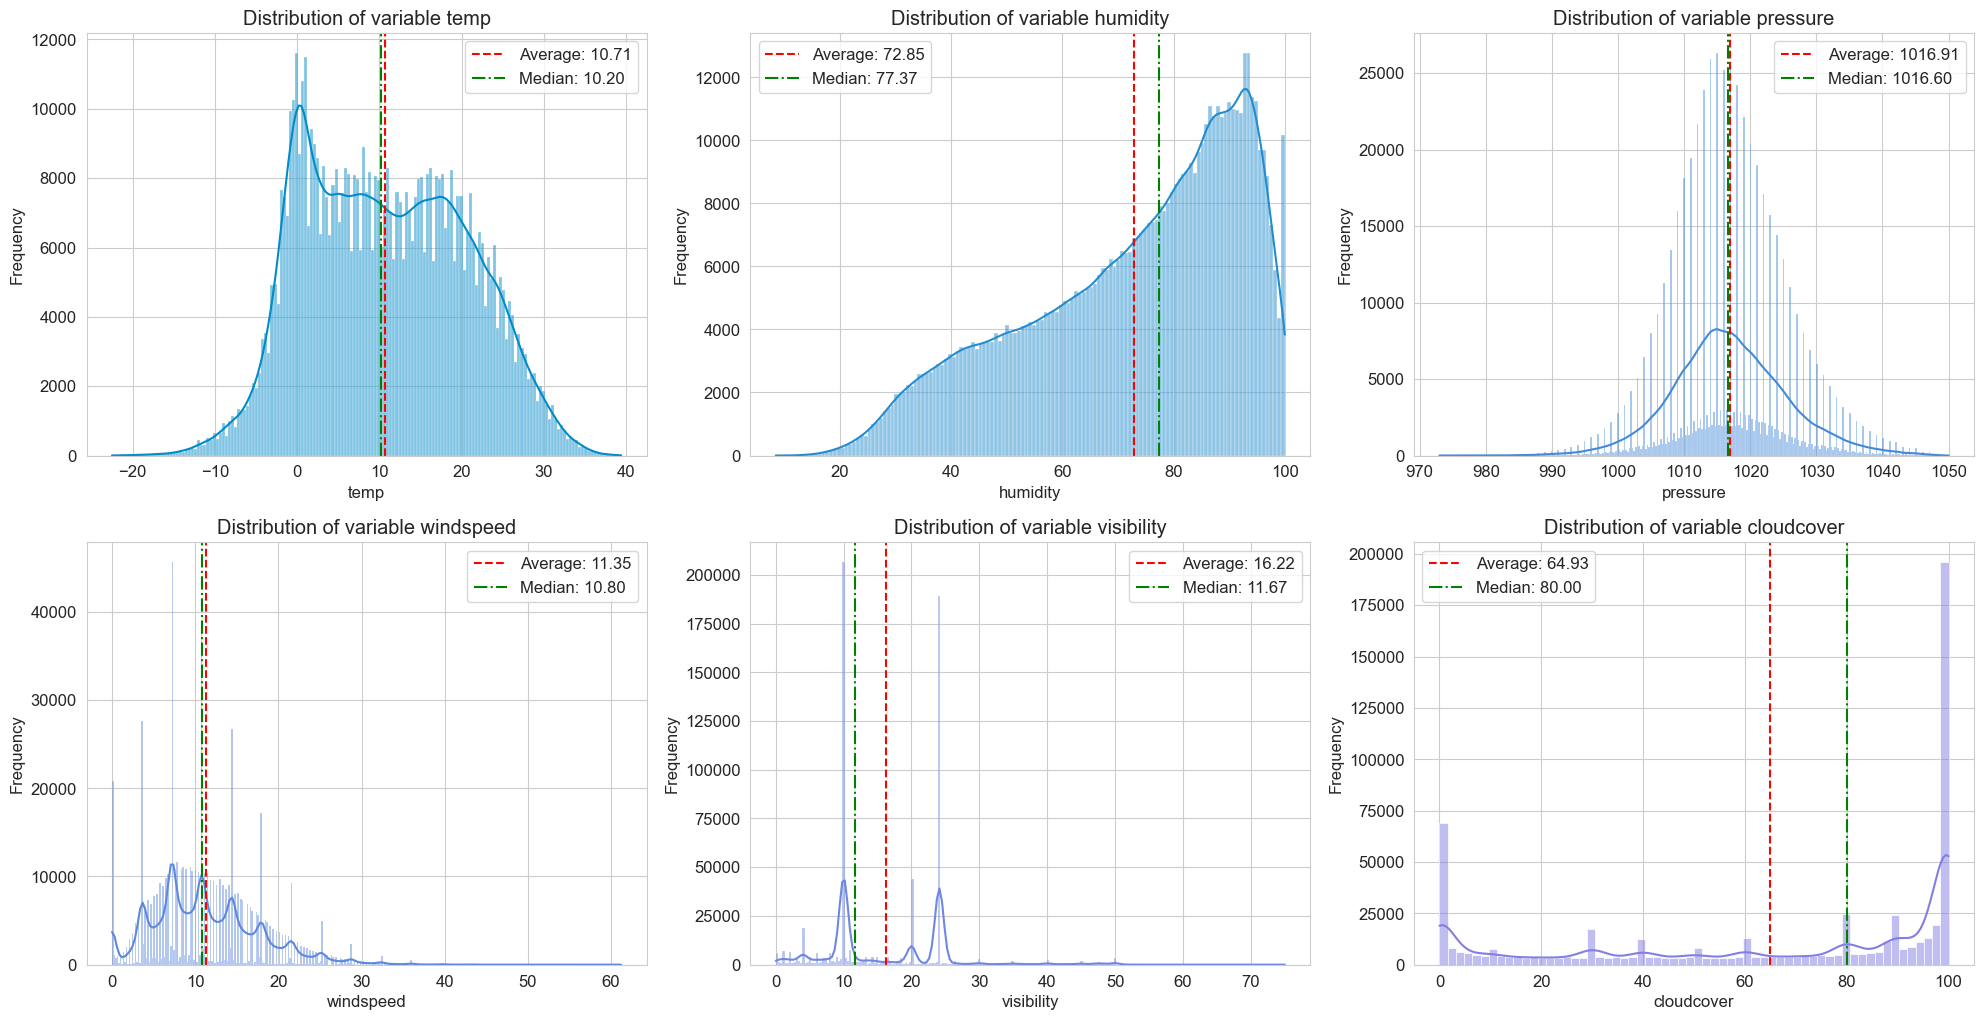

In [7]:
# PART 1: descriptive statistical analysis, general distribution of numeric variables
print("\n--- Analysis of distributions of numeric variables ---")

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True, color=colors[i % len(colors)])
    plt.axvline(df[column].mean(), color='red', linestyle='--', label=f'Average: {df[column].mean():.2f}')
    plt.axvline(df[column].median(), color='green', linestyle='-.', label=f'Median: {df[column].median():.2f}')
    plt.title(f'Distribution of variable {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
pdf.savefig()
plt.show()
plt.close()

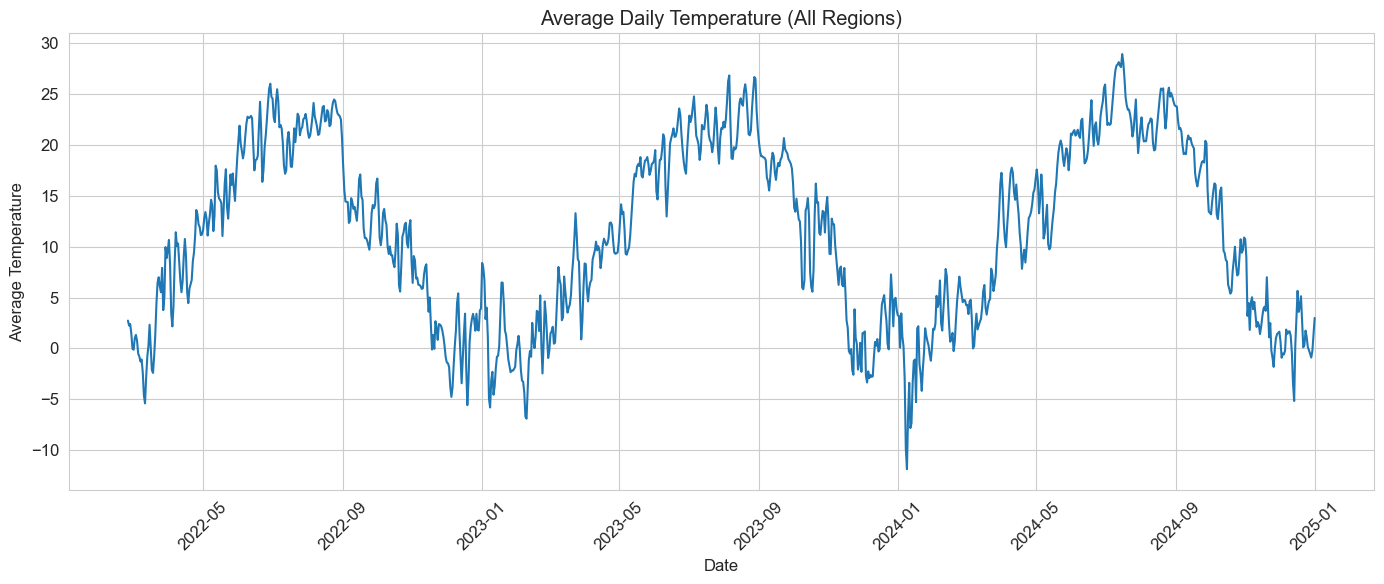

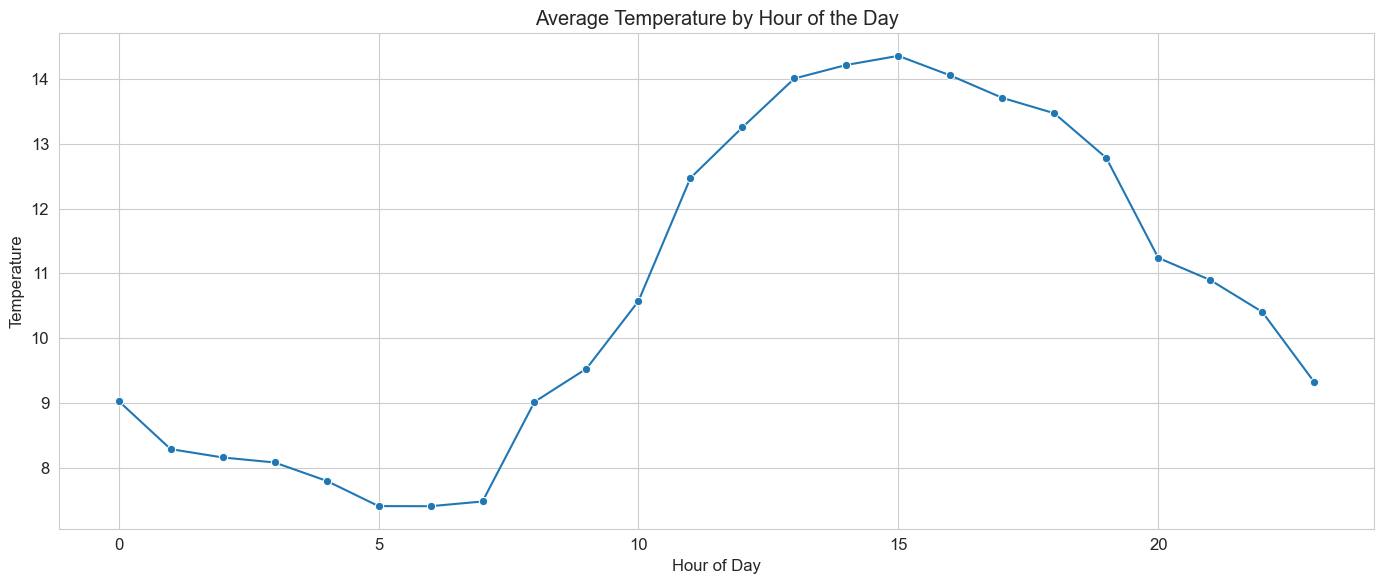

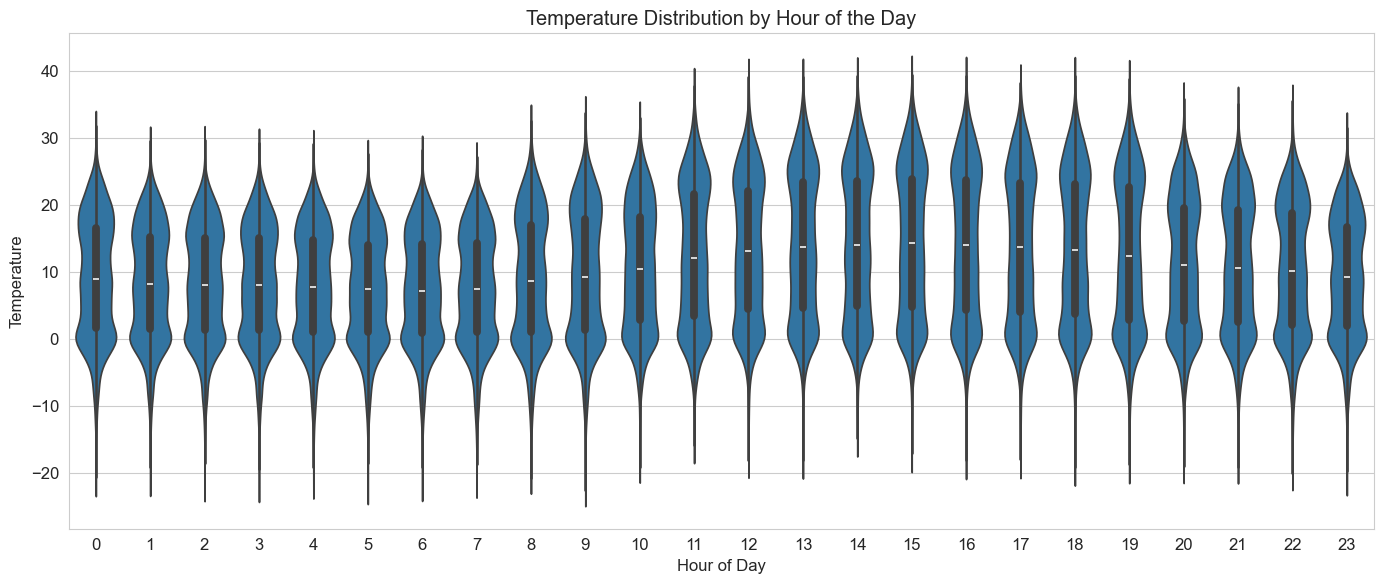

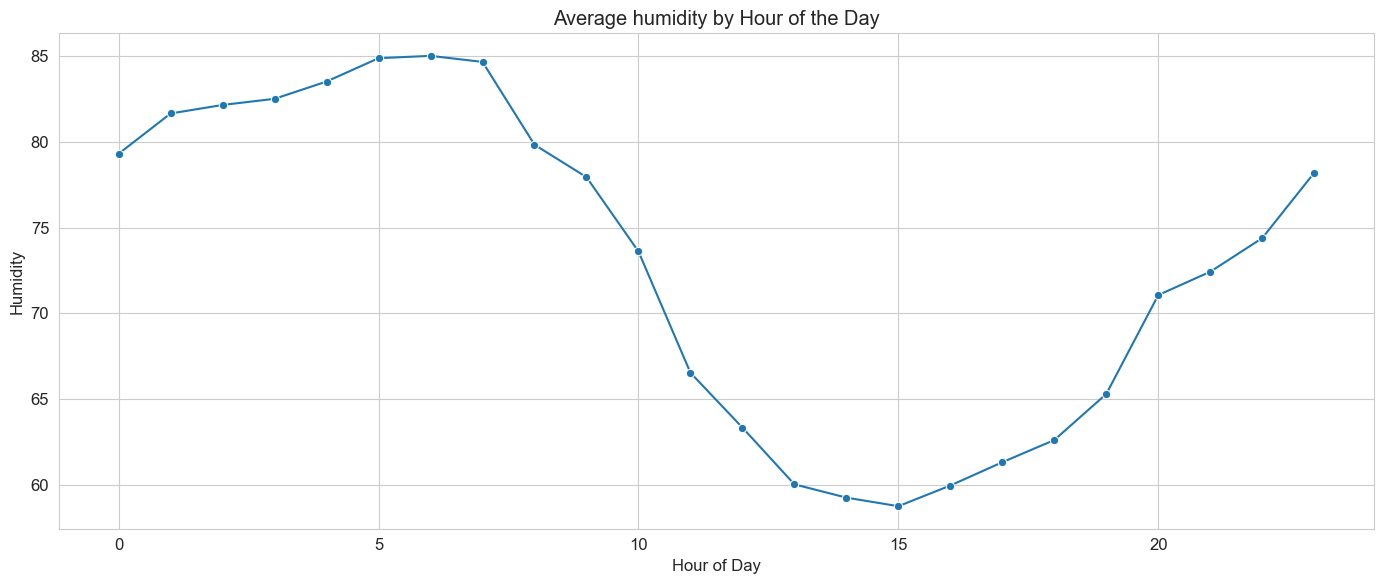

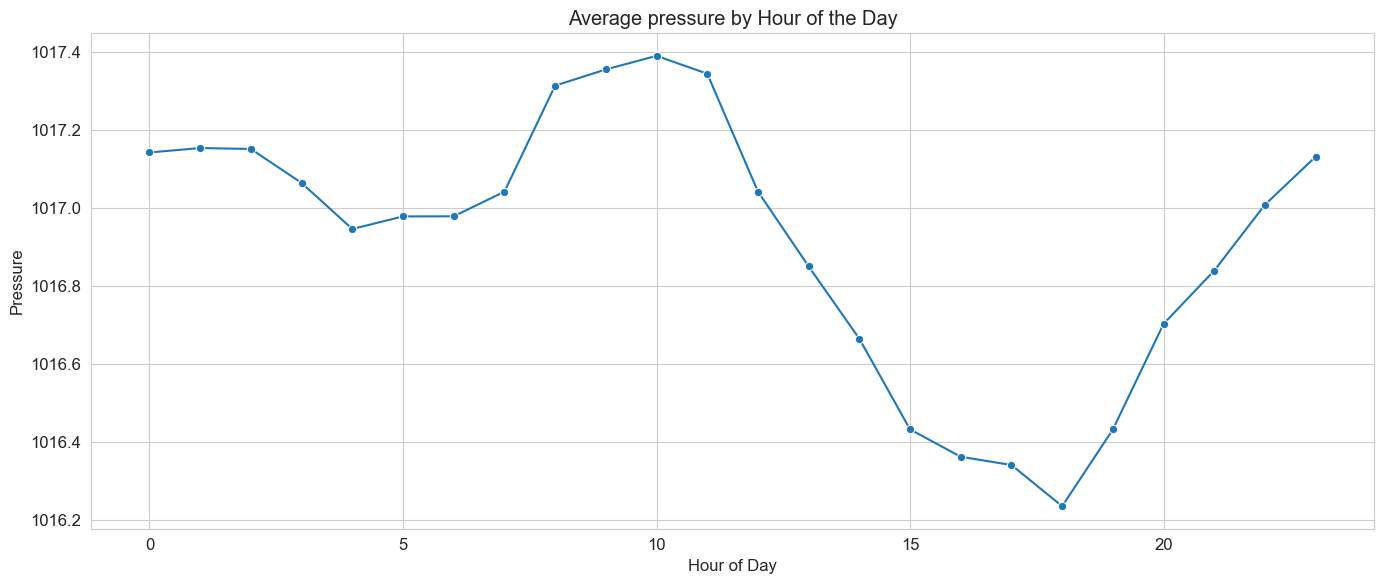

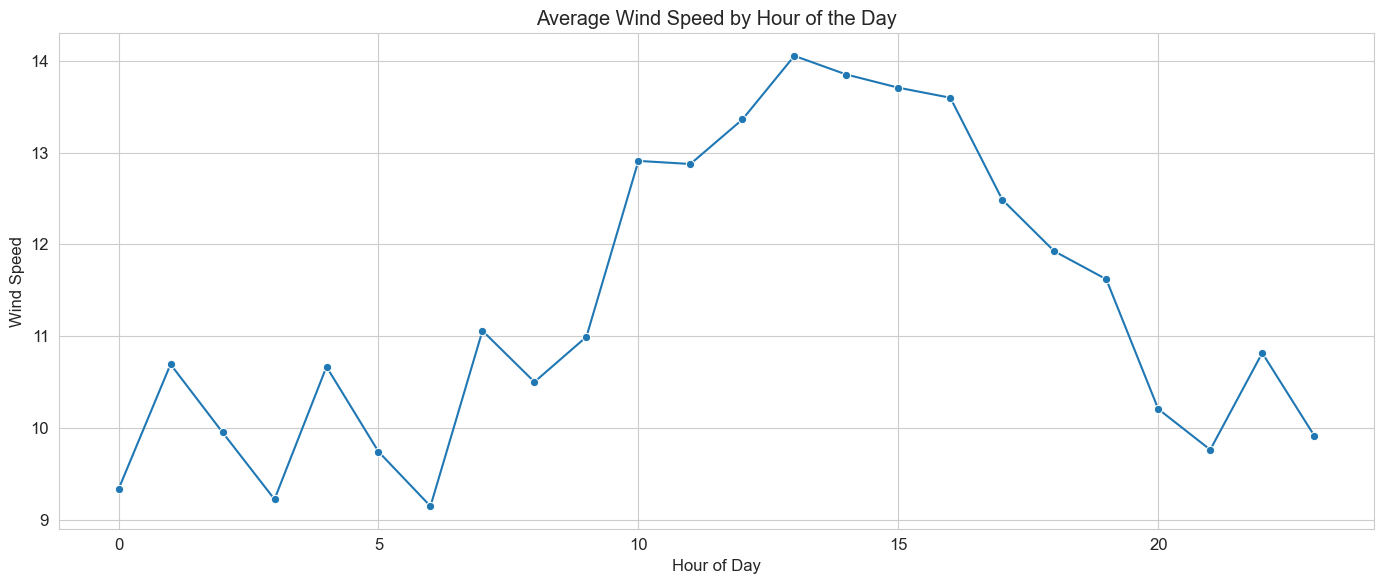

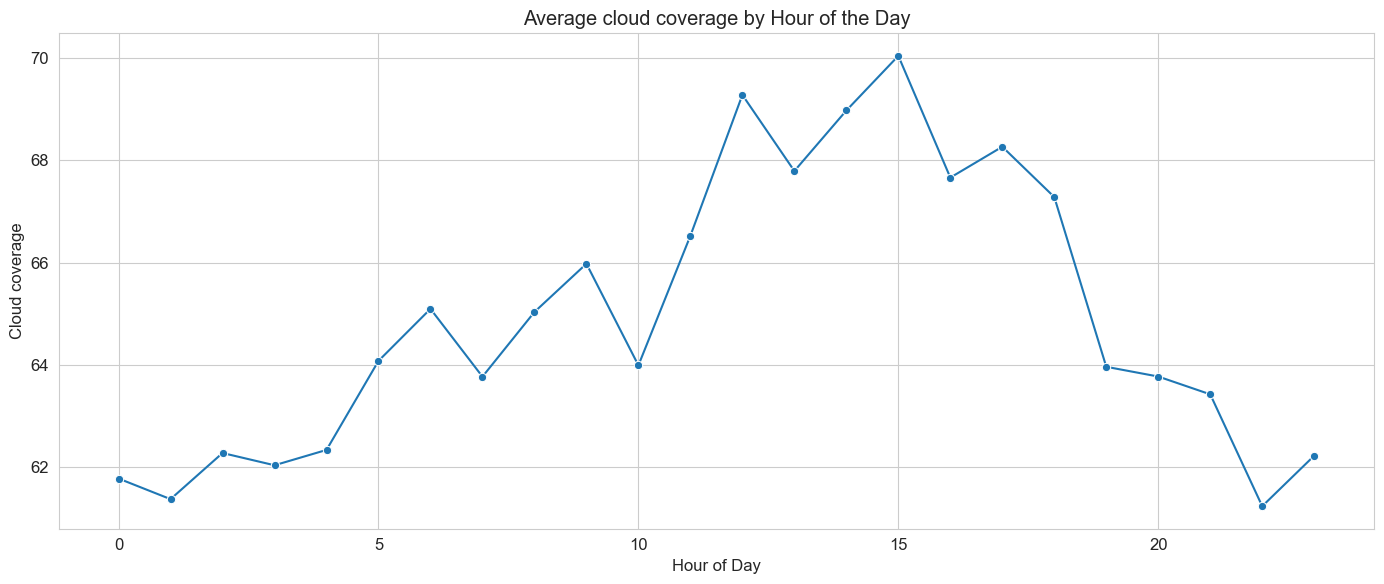

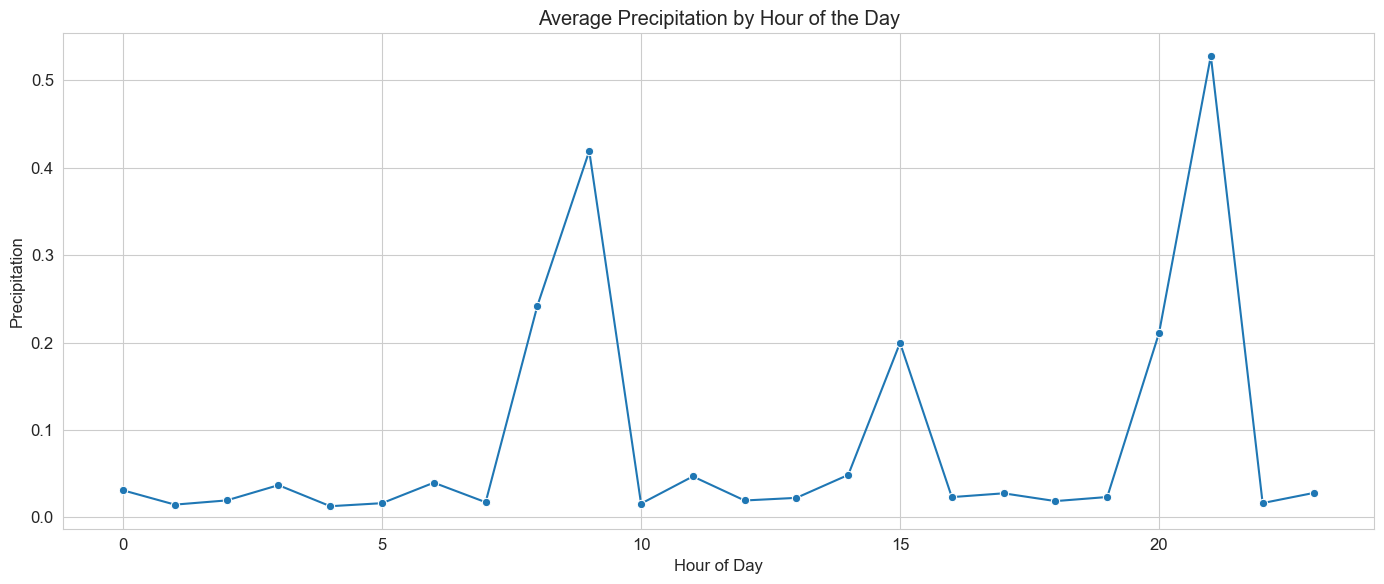

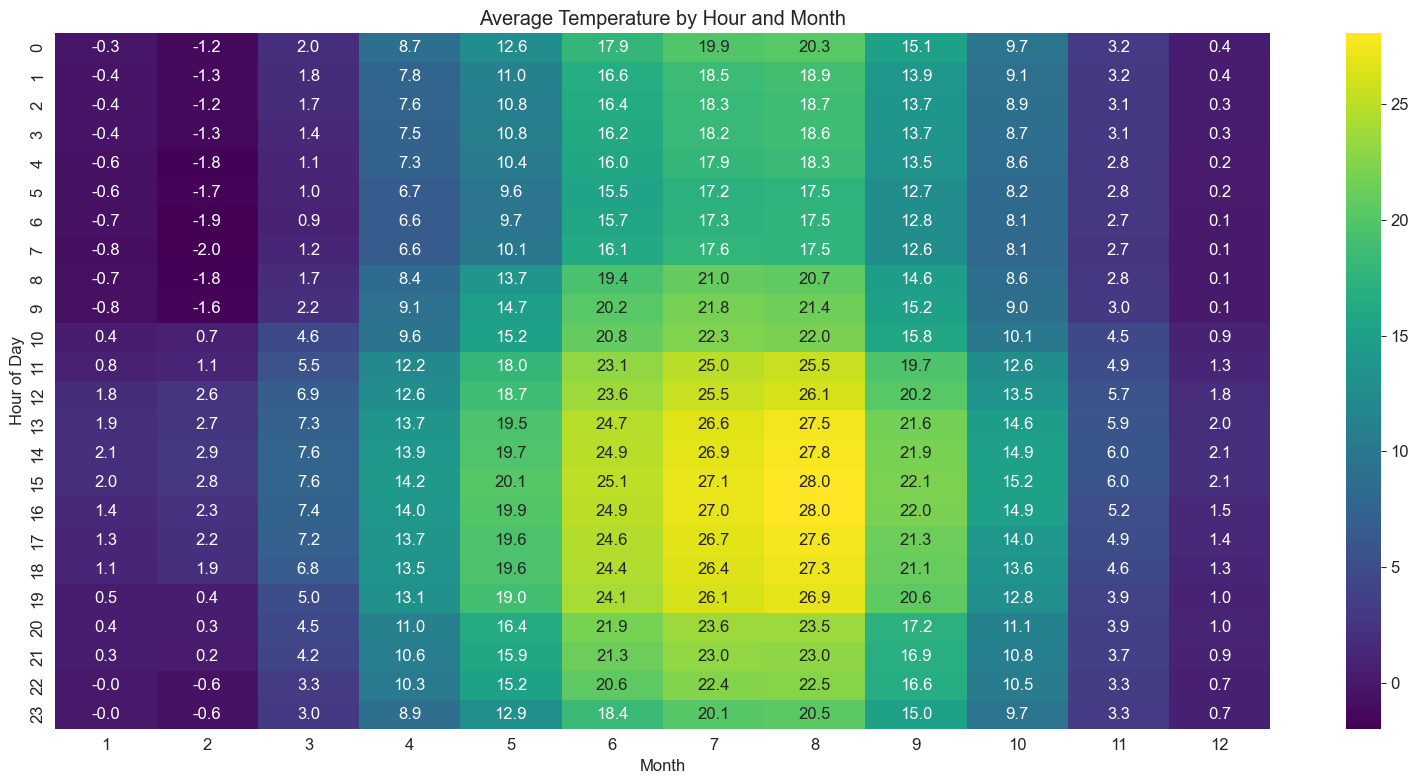

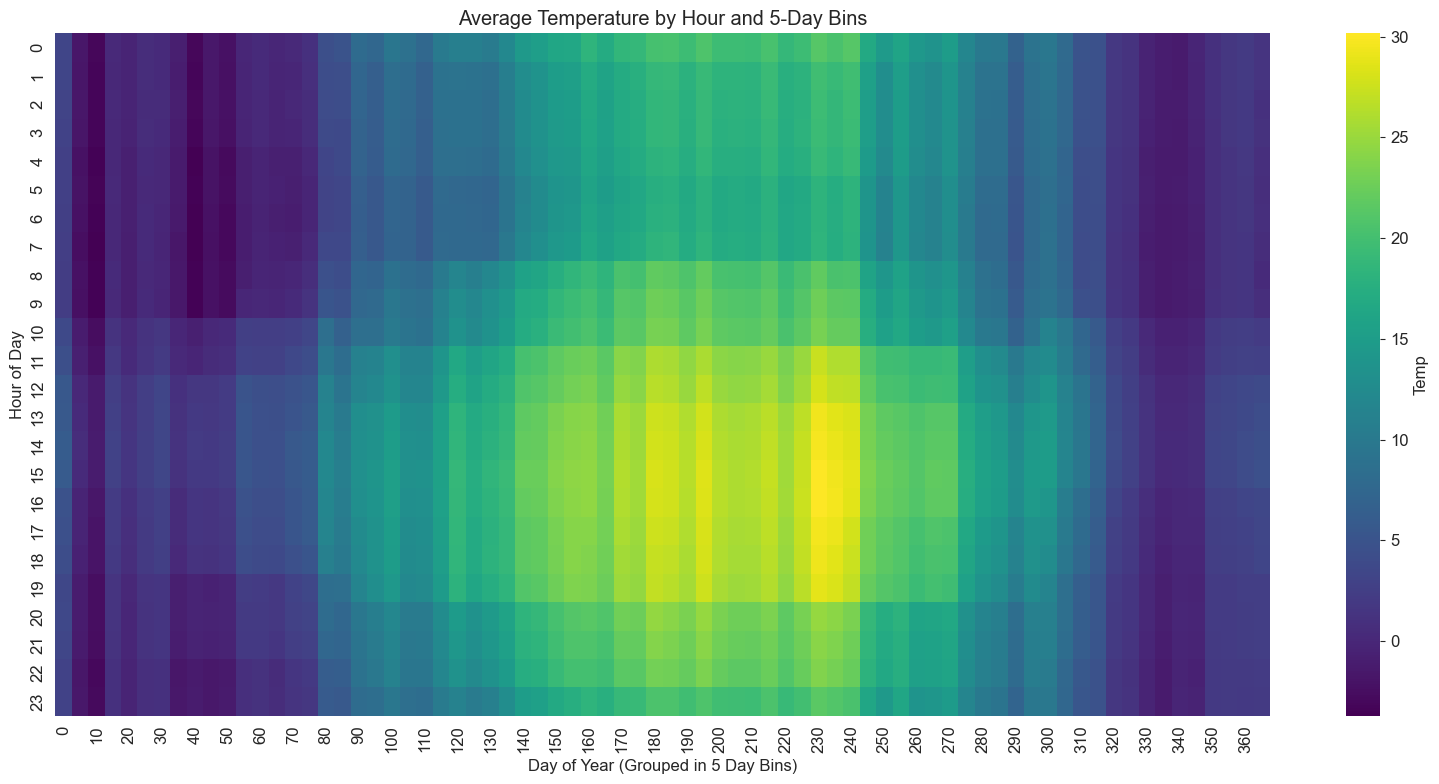

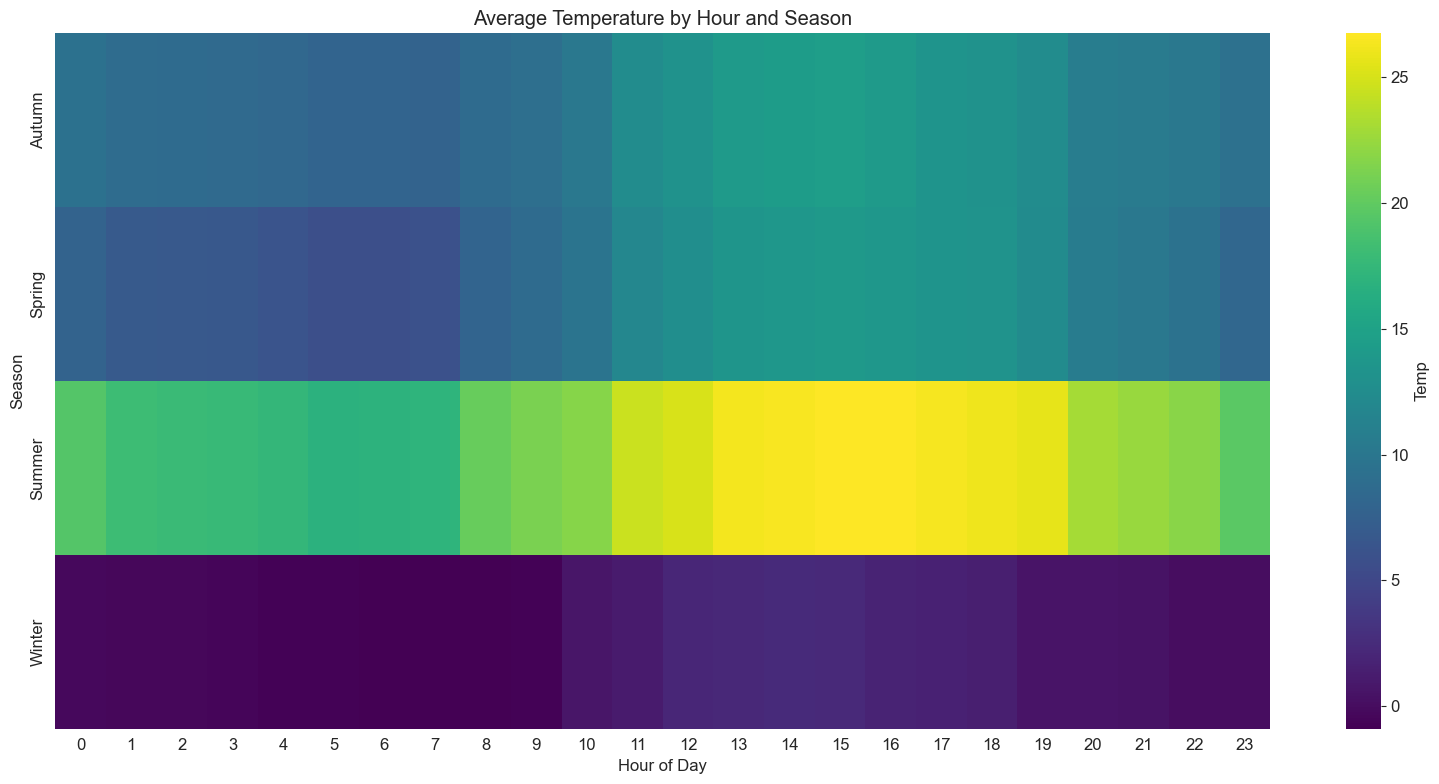

In [8]:
# PART 2: temporal patterns analysis
# 1. understanding the overall trend of average daily temperatures over the period
mask = (df['date'] >= '2022-02-24') & (df['date'] <= '2025-01-01')
df_period = df.loc[mask]
df_daily = df_period.groupby('date', as_index=False)['temp'].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_daily, x='date', y='temp')
plt.title('Average Daily Temperature (All Regions)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
pdf.savefig()
plt.show()

# 2. how weather parameters vary throughout a typical day (averaged across the entire dataset)
hourly_avg = df.groupby('hour').agg({
    'temp': 'mean',
    'humidity': 'mean',
    'pressure': 'mean',
    'windspeed': 'mean',
    'cloudcover': 'mean',
    'precip': 'mean',

}).reset_index()

# 2.1 Temperature
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='temp', marker='o')
plt.title('Average Temperature by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.tight_layout()
pdf.savefig()
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='hour', y='temp')
plt.title('Temperature Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.tight_layout()
pdf.savefig()
plt.show()

# 2.2 Humidity
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='humidity', marker='o')
plt.title('Average humidity by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.tight_layout()
pdf.savefig()
plt.show()

# 2.3 Pressure
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='pressure', marker='o')
plt.title('Average pressure by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.tight_layout()
pdf.savefig()
plt.show()

# 2.4 Wind speed
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='windspeed', marker='o')
plt.title('Average Wind Speed by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Speed')
plt.tight_layout()
pdf.savefig()
plt.show()

# 2.5 Cloud coverage
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='cloudcover', marker='o')
plt.title('Average cloud coverage by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Cloud coverage')
plt.tight_layout()
pdf.savefig()
plt.show()

# 2.6 Precipitation
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_avg, x='hour', y='precip', marker='o')
plt.title('Average Precipitation by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Precipitation')
plt.tight_layout()
pdf.savefig()
plt.show()



# 3. Heat Maps
# 3.1 how average temperature varies both throughout the day and across the months of the year
pivot_temp_month = df.pivot_table(
    values='temp',
    index='hour',
    columns='month',
    aggfunc='mean'
)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_temp_month, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Temperature by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.tight_layout()
pdf.savefig()
plt.show()

# 3.2 more granular view of temperature changes throughout the year at different hours
df['day_of_year_bin'] = (df['day_of_year'] // 5) * 5
pivot_temp_day = df.pivot_table(
    values='temp',
    index='hour',
    columns='day_of_year_bin',
    aggfunc='mean'
)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_temp_day, cmap='viridis', cbar_kws={'label': 'Temp'})
plt.title('Average Temperature by Hour and 5-Day Bins')
plt.xlabel('Day of Year (Grouped in 5 Day Bins)')
plt.ylabel('Hour of Day')
plt.tight_layout()
pdf.savefig()
plt.show()

# 3.3 summarizes the average temperature for each hour of the day across the four seasons
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['date'].apply(get_season)
pivot_temp_season = df.pivot_table(
    values='temp',
    index='hour',
    columns='season',
    aggfunc='mean'
)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_temp_season.T, cmap='viridis', cbar_kws={'label': 'Temp'})
plt.title('Average Temperature by Hour and Season')
plt.xlabel('Hour of Day')
plt.ylabel('Season')
plt.tight_layout()
pdf.savefig()
plt.show()


--- Analysis of Regional Differences by Column 'region_name' ---
Number of unique regions: 24


C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


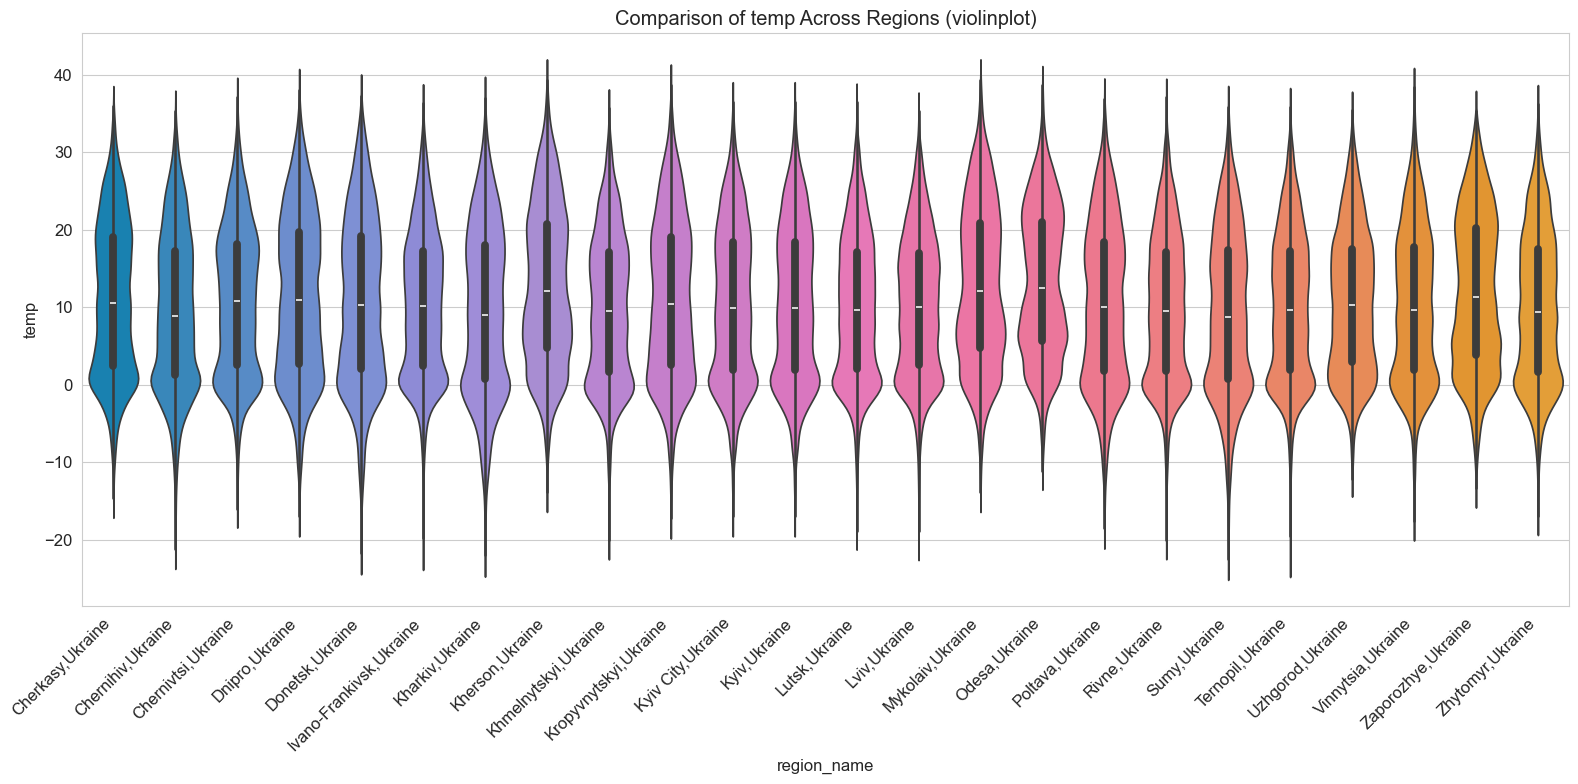

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


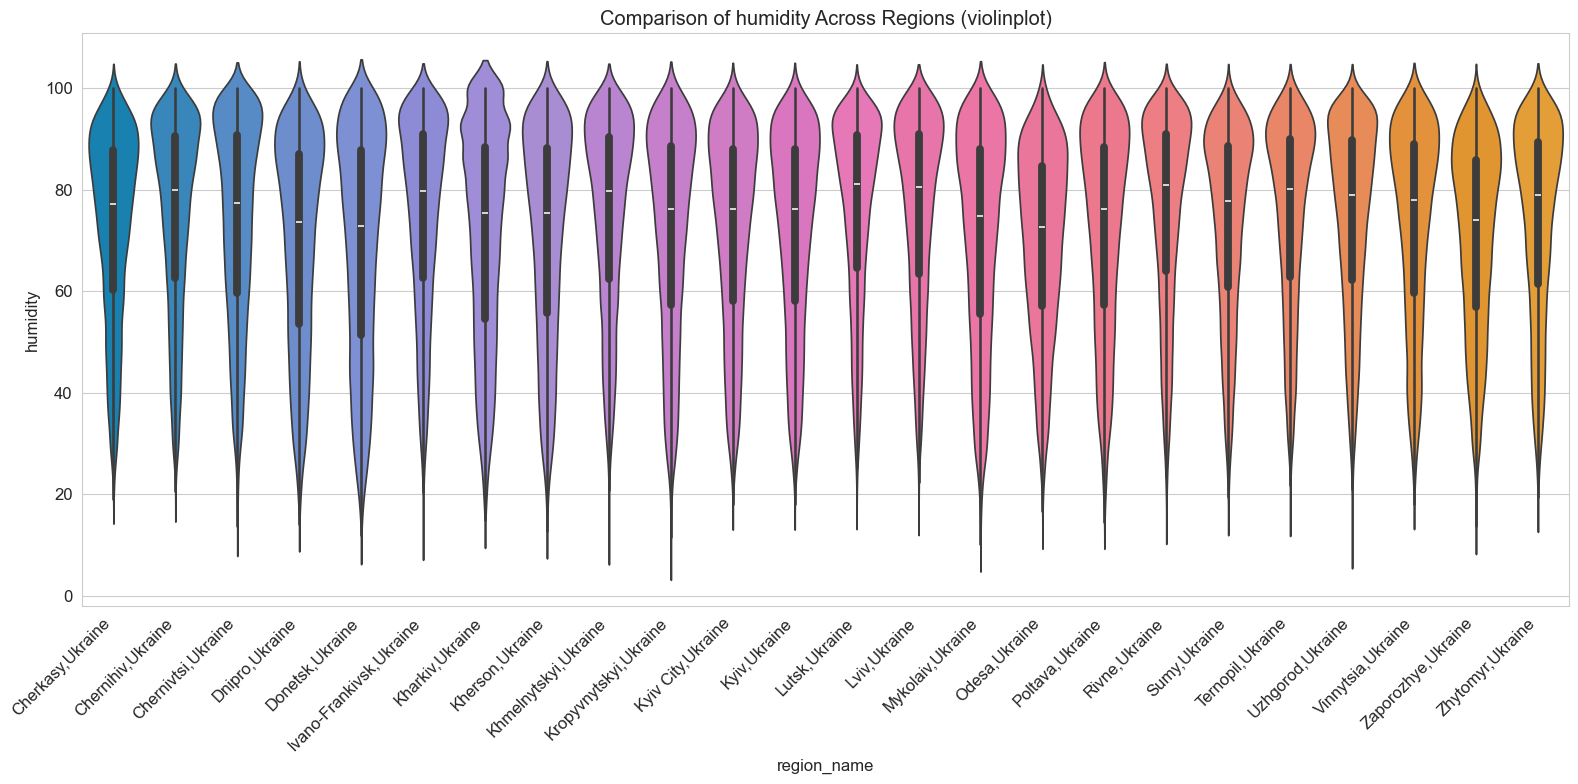

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


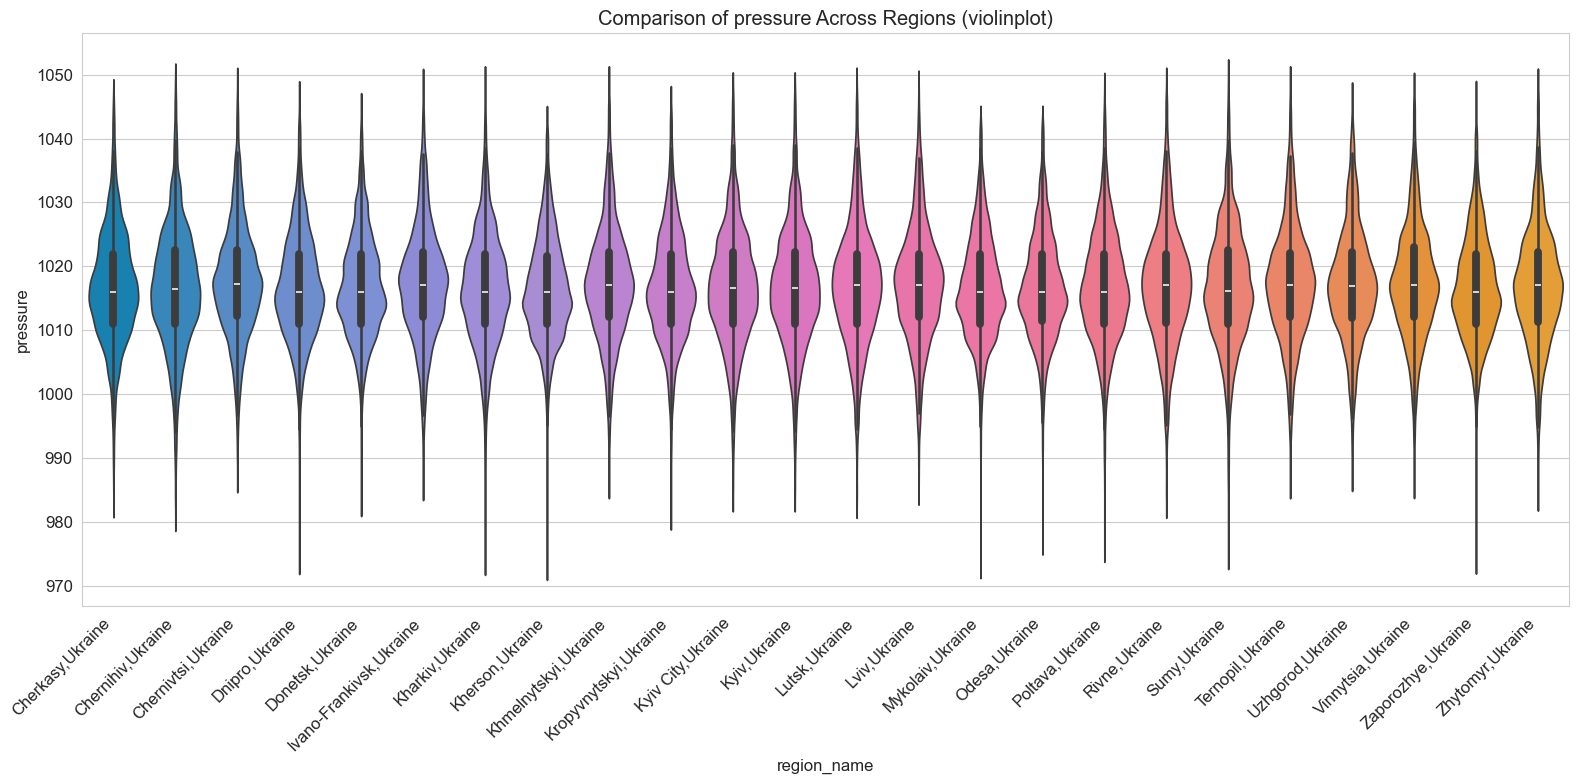

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


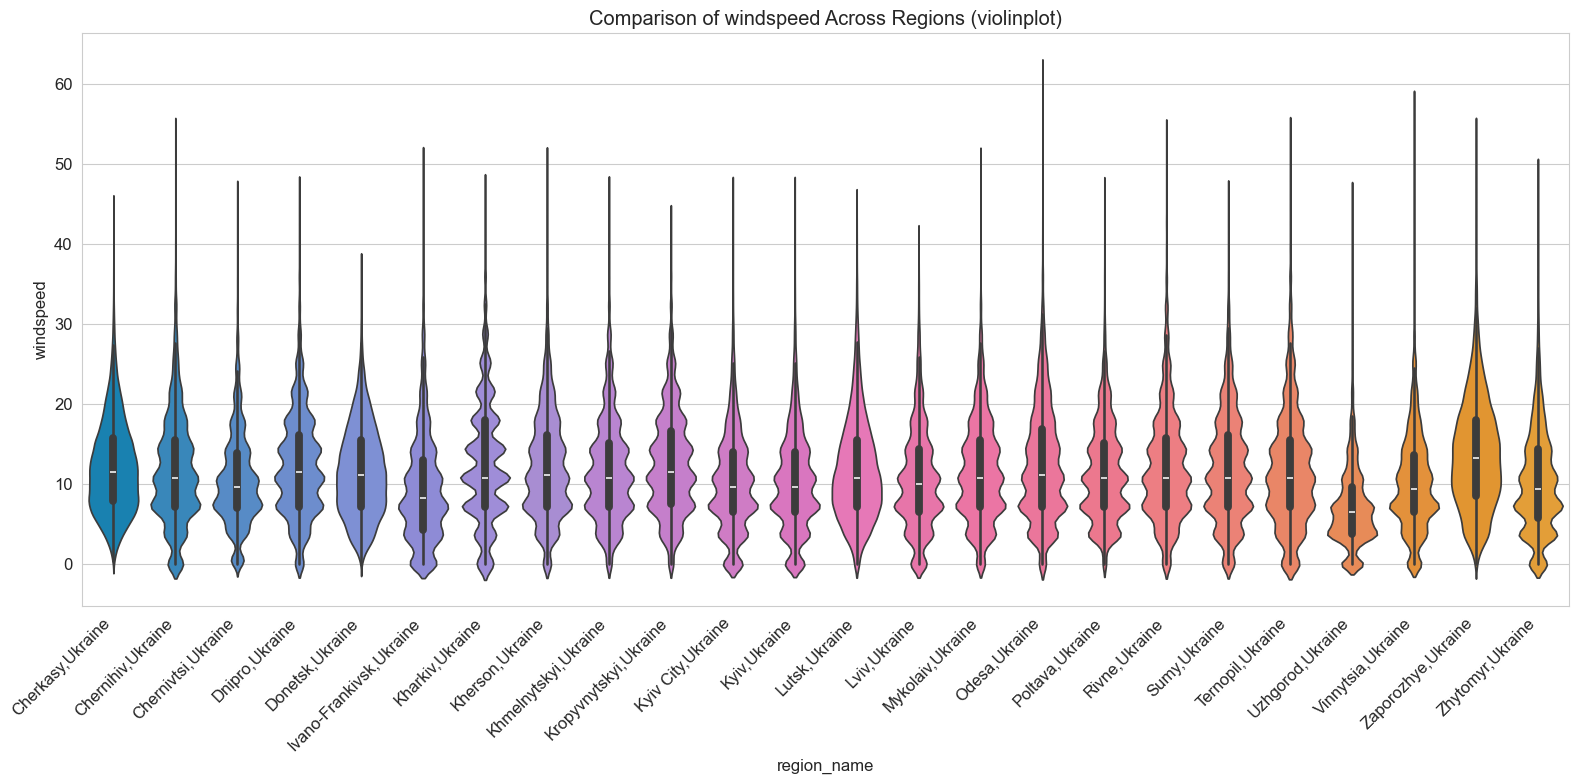

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


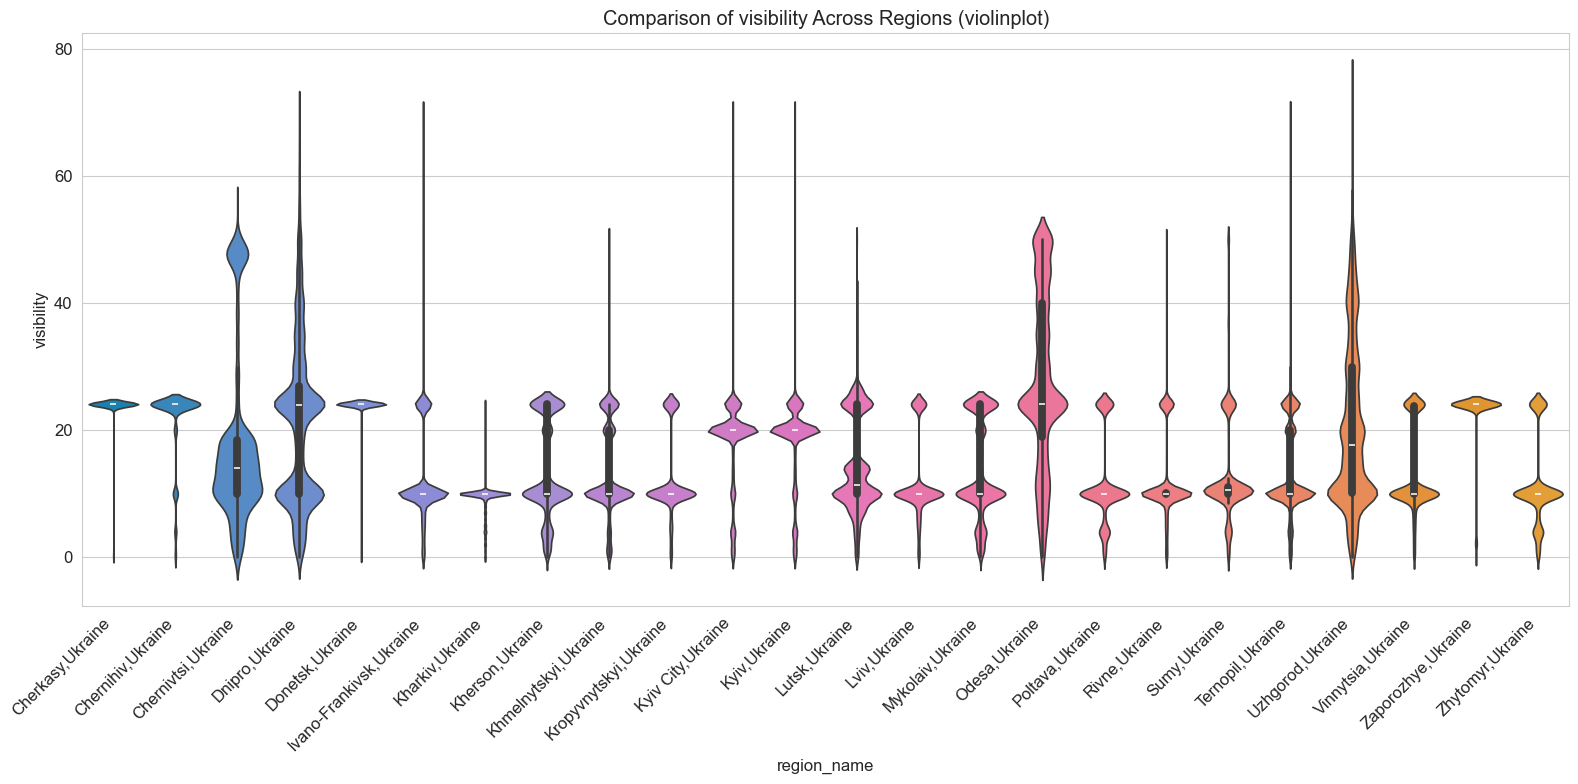

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\1414965301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=region_column, y=column, data=df, palette=colors)


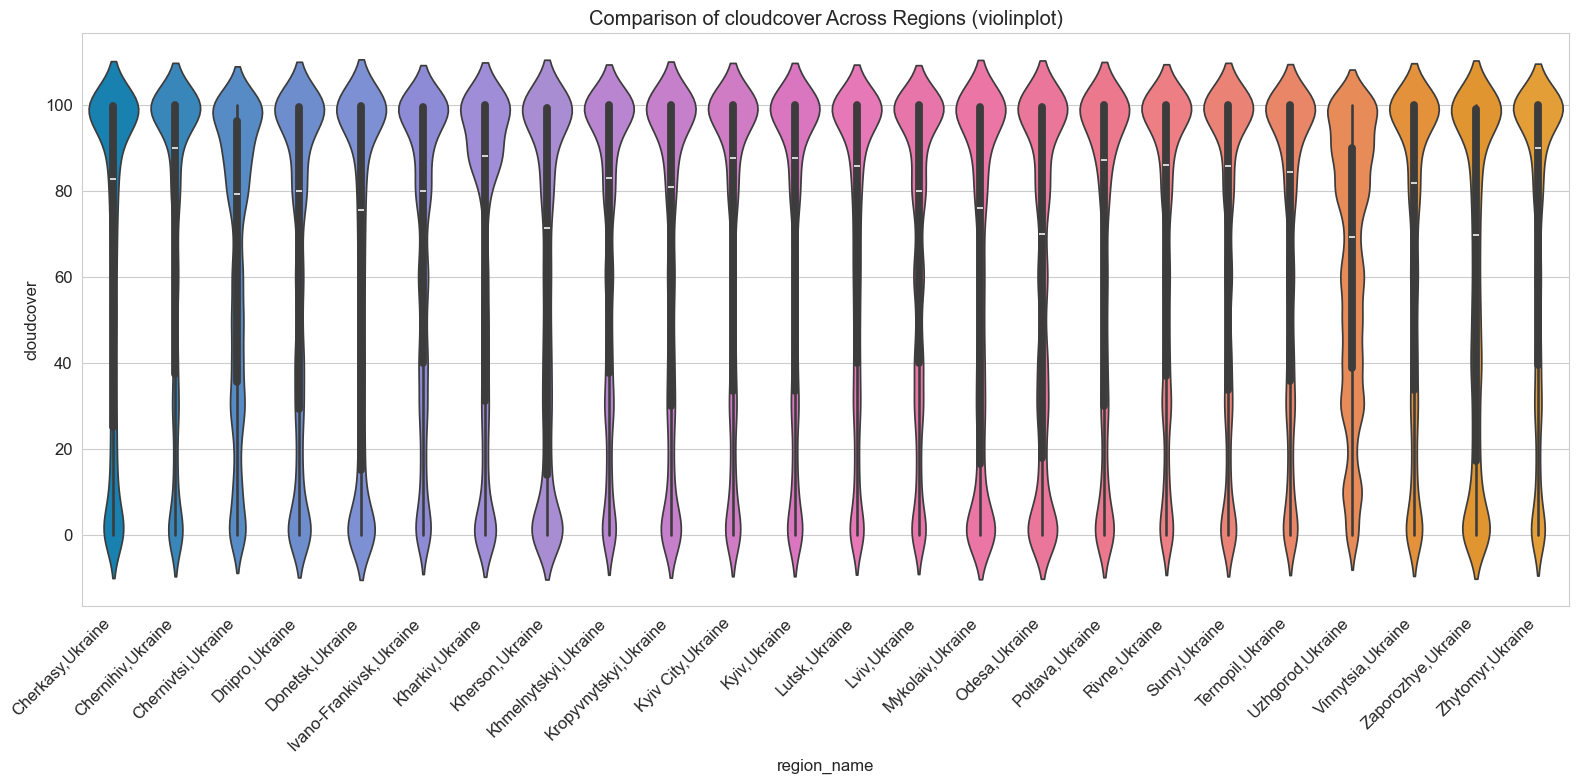

In [9]:
# PART 3: regional differences analysis
region_column = 'region_name'
if region_column:
    print(f"\n--- Analysis of Regional Differences by Column '{region_column}' ---")
    n_regions = df[region_column].nunique()
    print(f"Number of unique regions: {n_regions}")

    # Comparing Numeric Variables Across Regions
    for column in numeric_columns:
        plt.figure(figsize=(16, 8))

        sns.violinplot(x=region_column, y=column, data=df, palette=colors)
        plt.title(f'Comparison of {column} Across Regions (violinplot)')
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        pdf.savefig()
        plt.show()
        plt.close()

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\744819818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='colorblind')


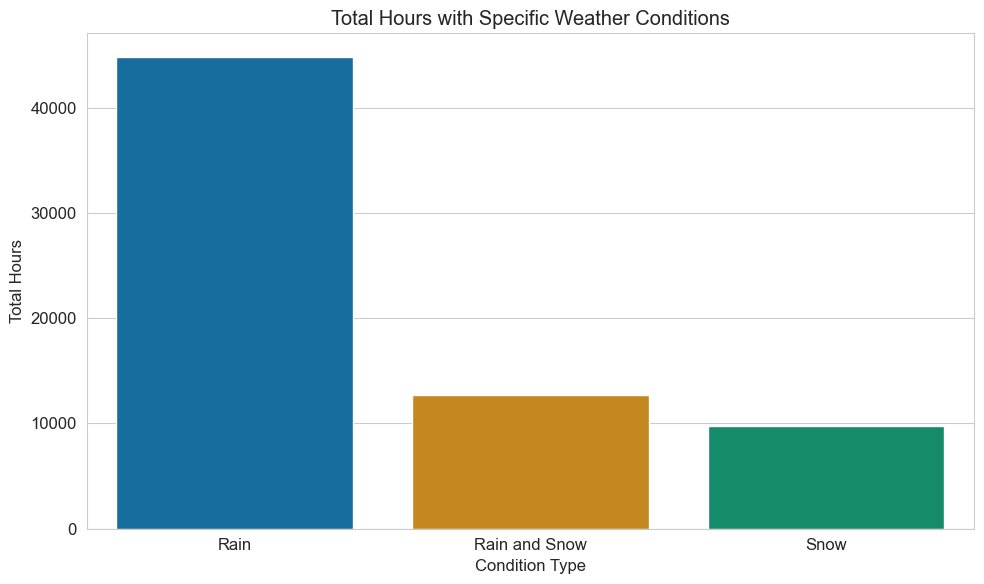

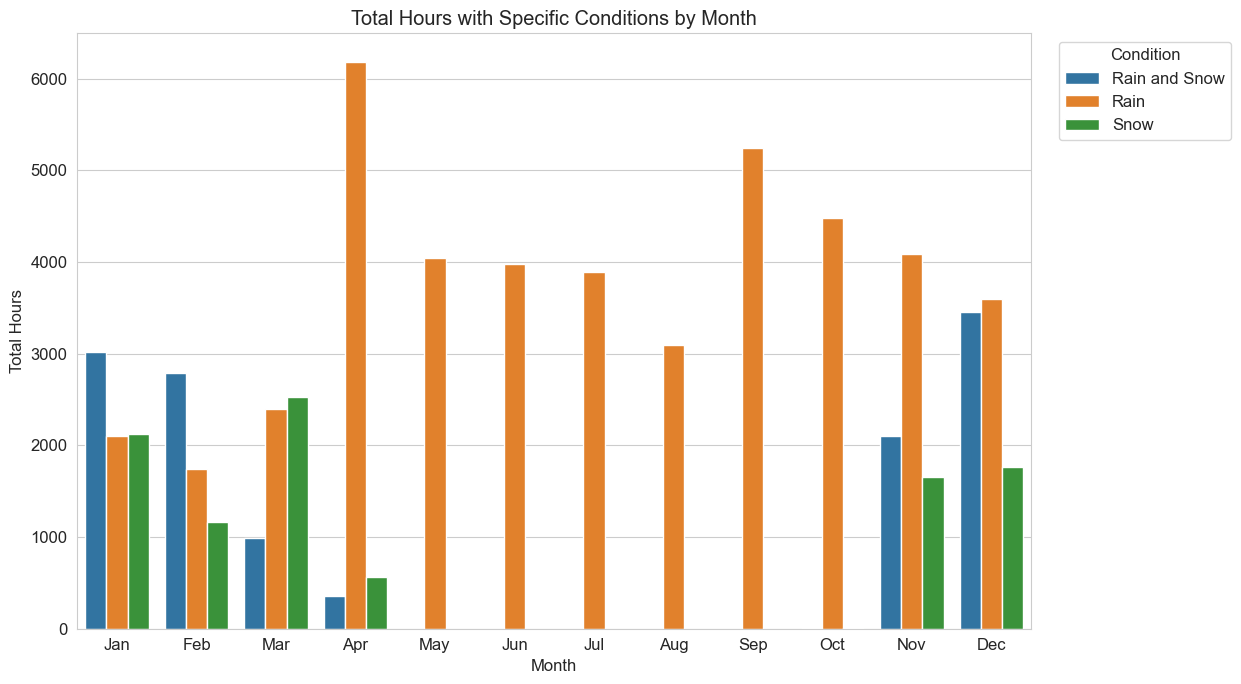

C:\Users\windo\AppData\Local\Temp\ipykernel_18812\744819818.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=data_to_plot.index, y=data_to_plot.values, palette=colors)
C:\Users\windo\AppData\Local\Temp\ipykernel_18812\744819818.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=data_to_plot.index, y=data_to_plot.values, palette=colors)
C:\Users\windo\AppData\Local\Temp\ipykernel_18812\744819818.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=data_to_plot.index, y=data_to_plot.values, palet

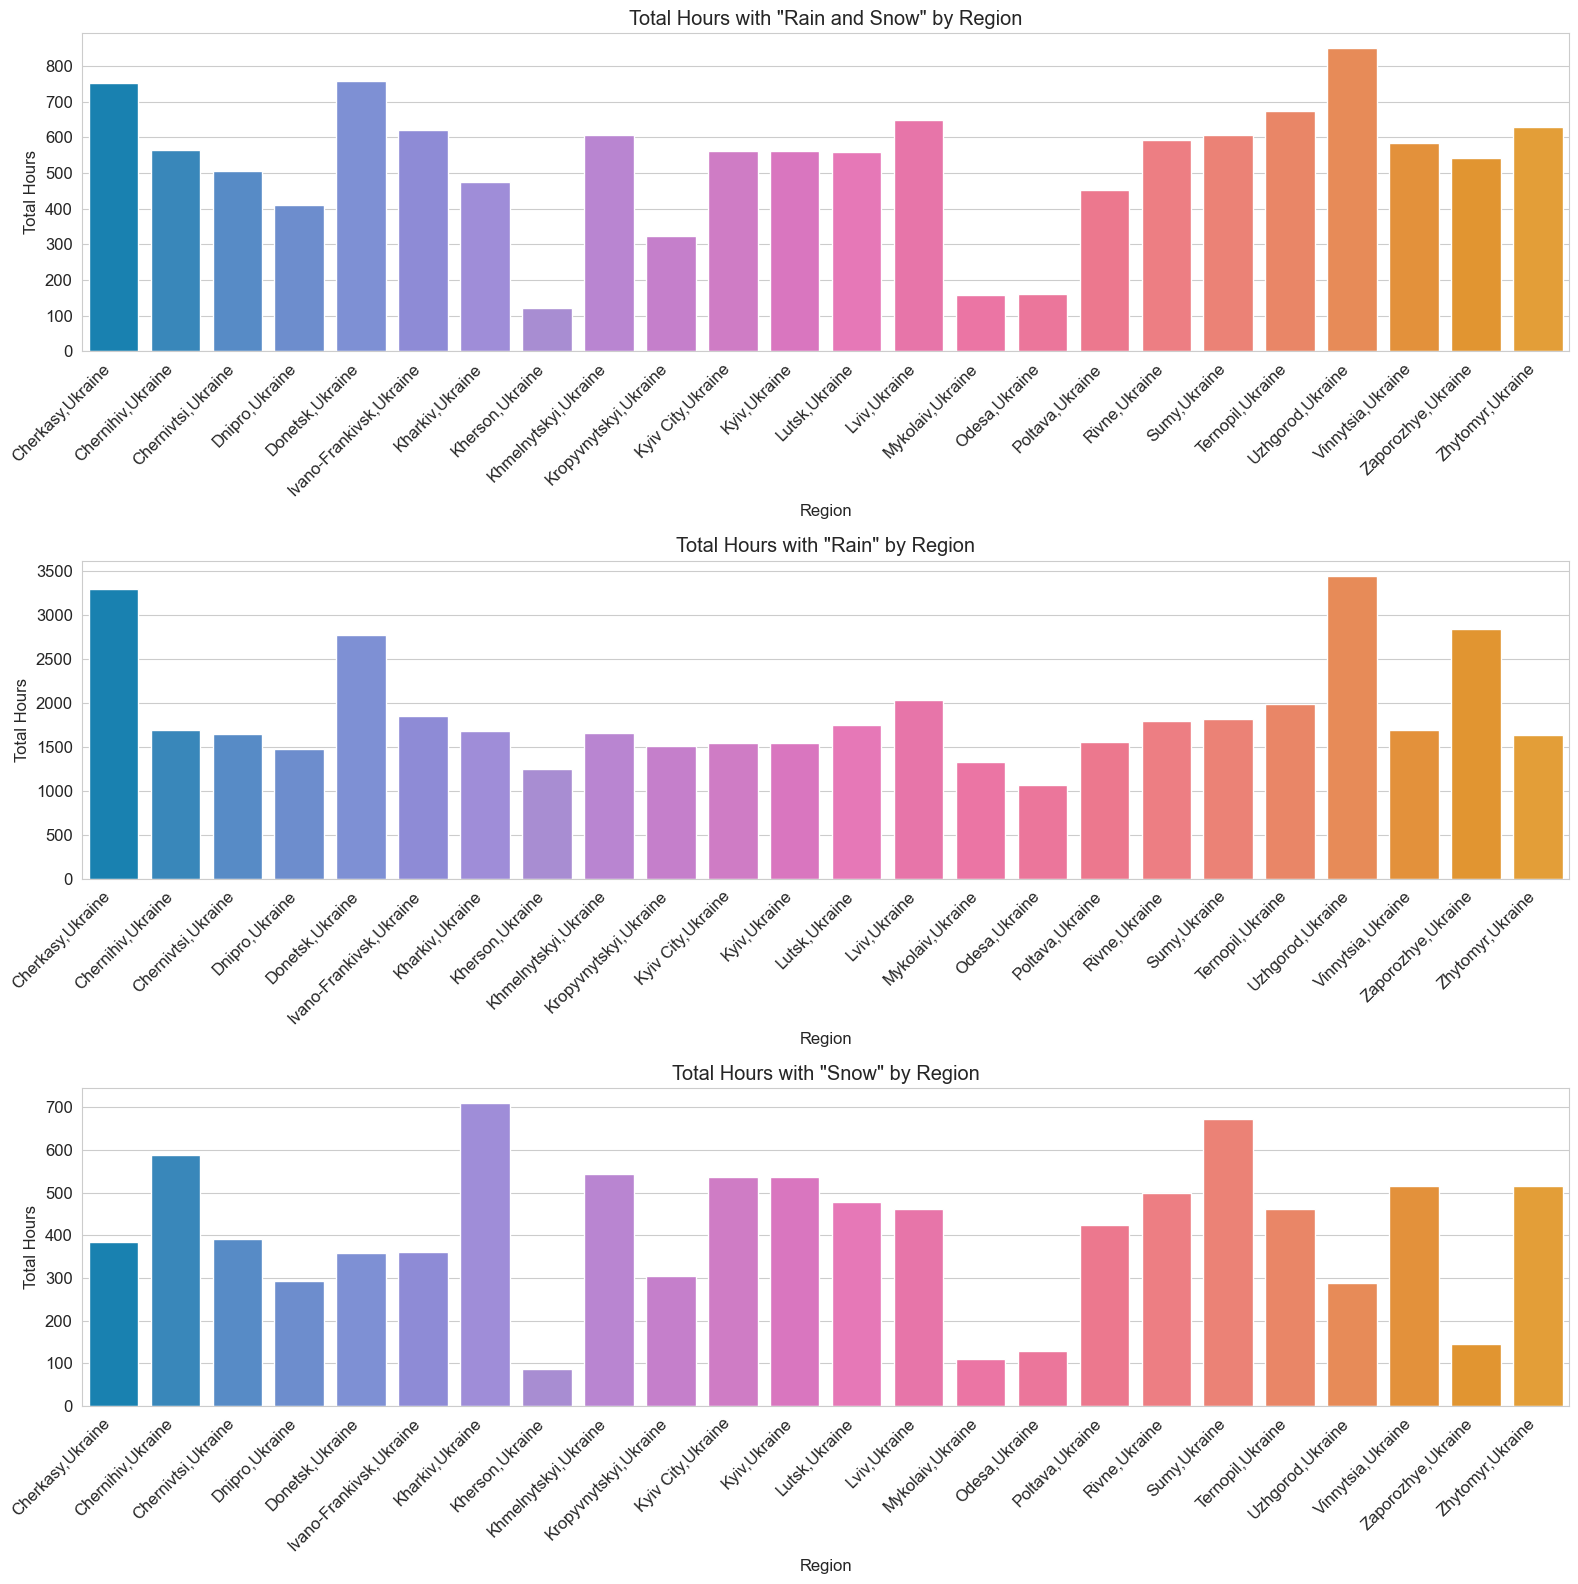

In [10]:
# PART 4: weather conditions (frequency) analysis
binary_cols = ['rain_snow_bin', 'rain_bin', 'snow_bin']
condition_counts = df[binary_cols].sum().sort_values(ascending=False)
new_labels = {'rain_snow_bin': 'Rain and Snow',
              'rain_bin': 'Rain',
              'snow_bin': 'Snow'}

# 4.1. Total hours with specific weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='colorblind')
plt.title('Total Hours with Specific Weather Conditions')
plt.ylabel('Total Hours')
plt.xlabel('Condition Type')

current_labels = [new_labels[label] for label in condition_counts.index]
plt.xticks(ticks=range(len(current_labels)), labels=current_labels, rotation=0)

plt.tight_layout()
pdf.savefig()
plt.show()


# 4.2. Total hours with specific conditions by month
monthly_counts = df.groupby('month')[binary_cols].sum().reset_index()
monthly_counts_melted = pd.melt(monthly_counts, id_vars=['month'], var_name='Condition', value_name='Total Hours')

monthly_counts_melted['Condition'] = monthly_counts_melted['Condition'].map(new_labels)

plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_counts_melted, x='month', y='Total Hours', hue='Condition')
plt.title('Total Hours with Specific Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Total Hours')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Condition', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])
pdf.savefig()
plt.show()


# 4.3. Total hours with specific conditions by region
regional_counts = df.groupby('region_name')[binary_cols].sum()

fig, axes = plt.subplots(3, 1, figsize=(16, 16), squeeze=False)
axes = axes.flatten()

for i, condition in enumerate(binary_cols):
    data_to_plot = regional_counts[condition]
    sns.barplot(ax=axes[i], x=data_to_plot.index, y=data_to_plot.values, palette=colors)
    axes[i].set_title(f'Total Hours with "{new_labels[condition]}" by Region')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel('Total Hours')
    axes[i].tick_params(axis='x', rotation=45)
    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

plt.tight_layout()
pdf.savefig()
plt.show()
plt.close()

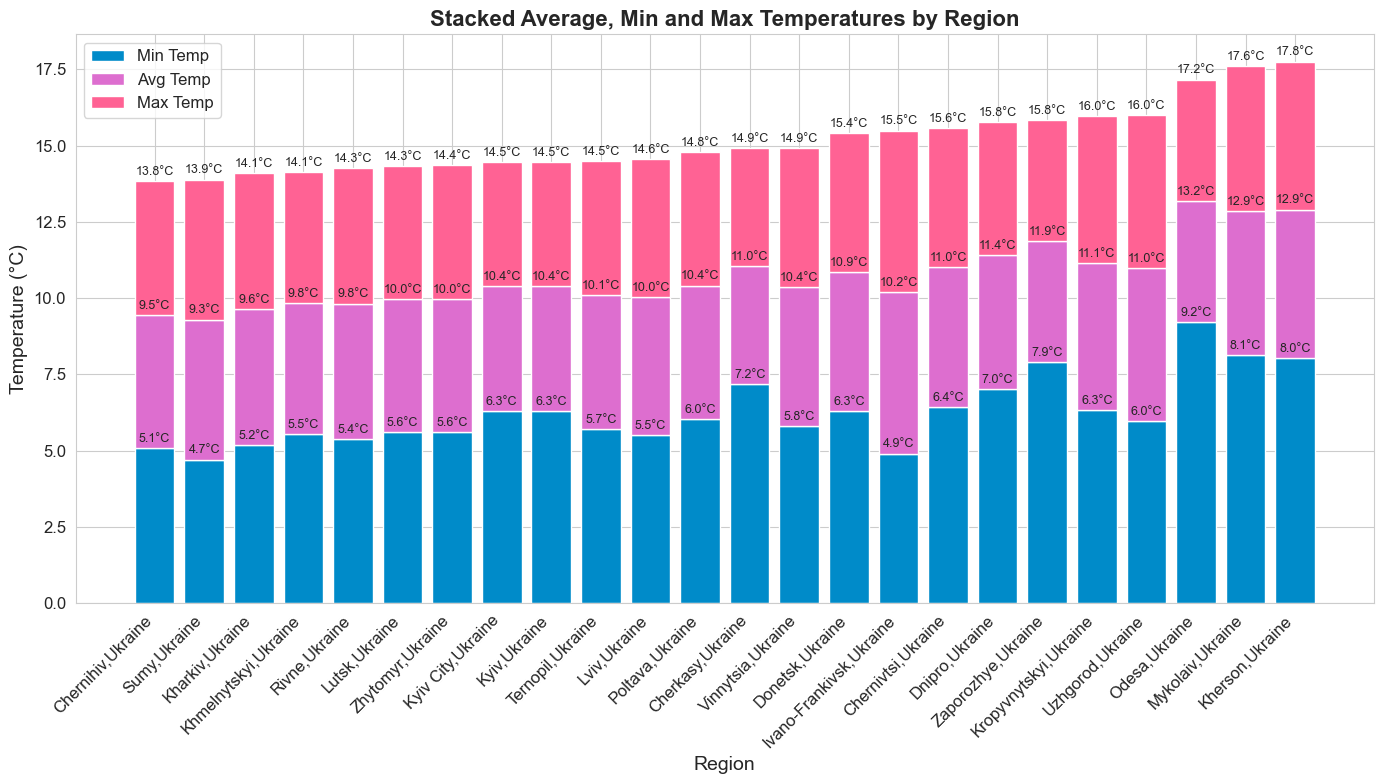

In [11]:
# PART 5: seasonal analysis
# 5.1. Average minimum, average, and average maximum temperatures for each region
summary = df.groupby('region_name').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).sort_values(by='tempmax')

summary['avg_temp'] = (summary['tempmax'] + summary['tempmin']) / 2
summary['min_part'] = summary['tempmin']
summary['avg_part'] = summary['avg_temp'] - summary['tempmin']
summary['max_part'] = summary['tempmax'] - summary['avg_temp']

regions = summary.index
x = range(len(regions))

plt.figure(figsize=(14, 8))

colors = {
    'min': '#008bc9',
    'avg': '#dd6ecf',
    'max': '#ff6294'
}

p1 = plt.bar(x, summary['min_part'], label='Min Temp', color=colors['min'])
p2 = plt.bar(x, summary['avg_part'], bottom=summary['min_part'], label='Avg Temp', color=colors['avg'])
p3 = plt.bar(x, summary['max_part'],
             bottom=summary['min_part'] + summary['avg_part'], label='Max Temp', color=colors['max'])

for i in x:
    row = summary.iloc[i]
    plt.text(i, row['tempmin'] + 0.2, f"{row['tempmin']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['avg_temp'] + 0.2, f"{row['avg_temp']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['tempmax'] + 0.2, f"{row['tempmax']:.1f}°C", ha='center', fontsize=9)

plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.title("Stacked Average, Min and Max Temperatures by Region", fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
pdf.savefig()
plt.show()



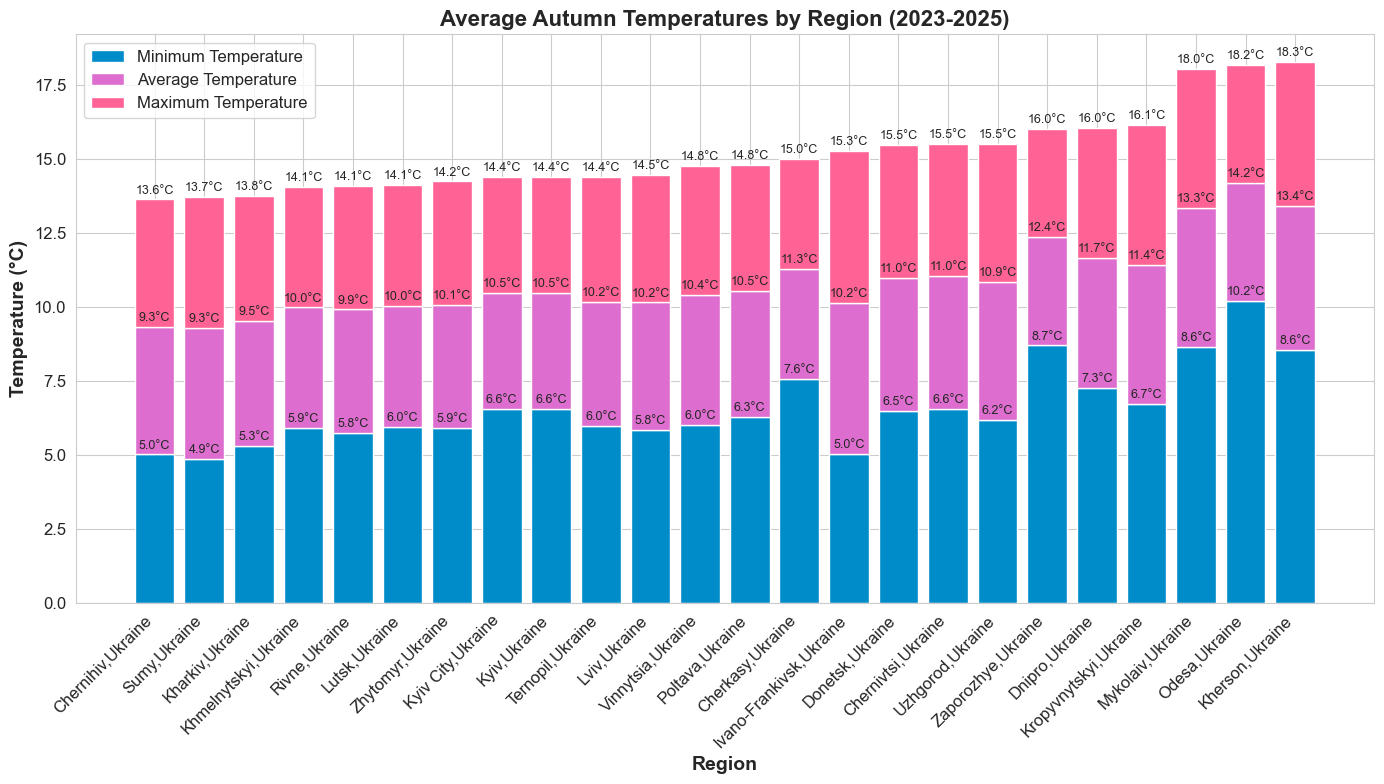

In [12]:
# 5.2. Average minimum, average, and average maximum temperatures during the autumn season
def get_autumn_data(df):
    autumn_df = df[(df['date'].dt.month >= 9) & (df['date'].dt.month <= 11)]
    return autumn_df

df_autumn = get_autumn_data(df)
summary = df_autumn.groupby('region_name').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).sort_values(by='tempmax', ascending=True)

summary['avg_temp'] = (summary['tempmax'] + summary['tempmin']) / 2

min_parts = summary['tempmin']
avg_parts = summary['avg_temp'] - summary['tempmin']
max_parts = summary['tempmax'] - summary['avg_temp']
regions = summary.index
x = range(len(regions))
plt.figure(figsize=(14, 8))

colors = {
    'min': '#008bc9',
    'avg': '#dd6ecf',
    'max': '#ff6294'
}

p1 = plt.bar(x, min_parts, label='Minimum Temperature', color=colors['min'])
p2 = plt.bar(x, avg_parts, bottom=min_parts, label='Average Temperature', color=colors['avg'])
p3 = plt.bar(x, max_parts, bottom=min_parts + avg_parts, label='Maximum Temperature', color=colors['max'])

for i in x:
    min_val = summary.iloc[i]['tempmin']
    avg_val = summary.iloc[i]['avg_temp']
    max_val = summary.iloc[i]['tempmax']

    row = summary.iloc[i]
    plt.text(i, row['tempmin'] + 0.2, f"{row['tempmin']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['avg_temp'] + 0.2, f"{row['avg_temp']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['tempmax'] + 0.2, f"{row['tempmax']:.1f}°C", ha='center', fontsize=9)


plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.title("Average Autumn Temperatures by Region (2023-2025)",fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
pdf.savefig()
plt.show()


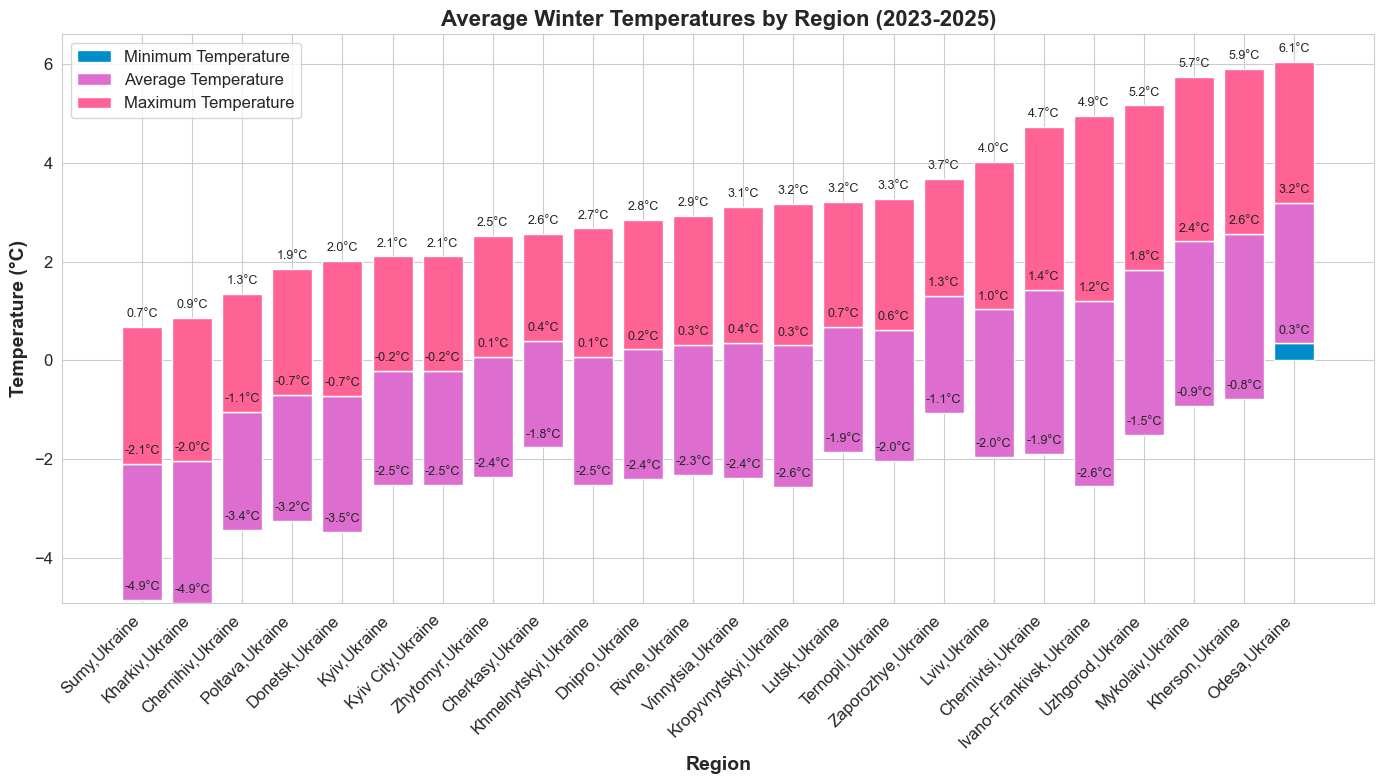

In [13]:
# 5.3. Average minimum, average, and average maximum temperatures during the winter season
def get_winter_data(df):
    # Fix the winter month logic - December (12) of previous year, January (1) and February (2) of current year
    winter_df = df[(df['date'].dt.month == 12) | (df['date'].dt.month <= 2)]
    return winter_df

df_winter = get_winter_data(df)
summary = df_winter.groupby('region_name').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).sort_values(by='tempmax', ascending=True)

summary['avg_temp'] = (summary['tempmax'] + summary['tempmin']) / 2

min_parts = summary['tempmin']
avg_parts = summary['avg_temp'] - summary['tempmin']
max_parts = summary['tempmax'] - summary['avg_temp']
regions = summary.index
x = range(len(regions))
plt.figure(figsize=(14, 8))

colors = {
    'min': '#008bc9',
    'avg': '#dd6ecf',
    'max': '#ff6294'
}

p1 = plt.bar(x, min_parts, label='Minimum Temperature', color=colors['min'])
p2 = plt.bar(x, avg_parts, bottom=min_parts, label='Average Temperature', color=colors['avg'])
p3 = plt.bar(x, max_parts, bottom=min_parts + avg_parts, label='Maximum Temperature', color=colors['max'])

for i in x:
    min_val = summary.iloc[i]['tempmin']
    avg_val = summary.iloc[i]['avg_temp']
    max_val = summary.iloc[i]['tempmax']

    row = summary.iloc[i]
    plt.text(i, row['tempmin'] + 0.2, f"{row['tempmin']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['avg_temp'] + 0.2, f"{row['avg_temp']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['tempmax'] + 0.2, f"{row['tempmax']:.1f}°C", ha='center', fontsize=9)


plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.title("Average Winter Temperatures by Region (2023-2025)",fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
pdf.savefig()
plt.show()


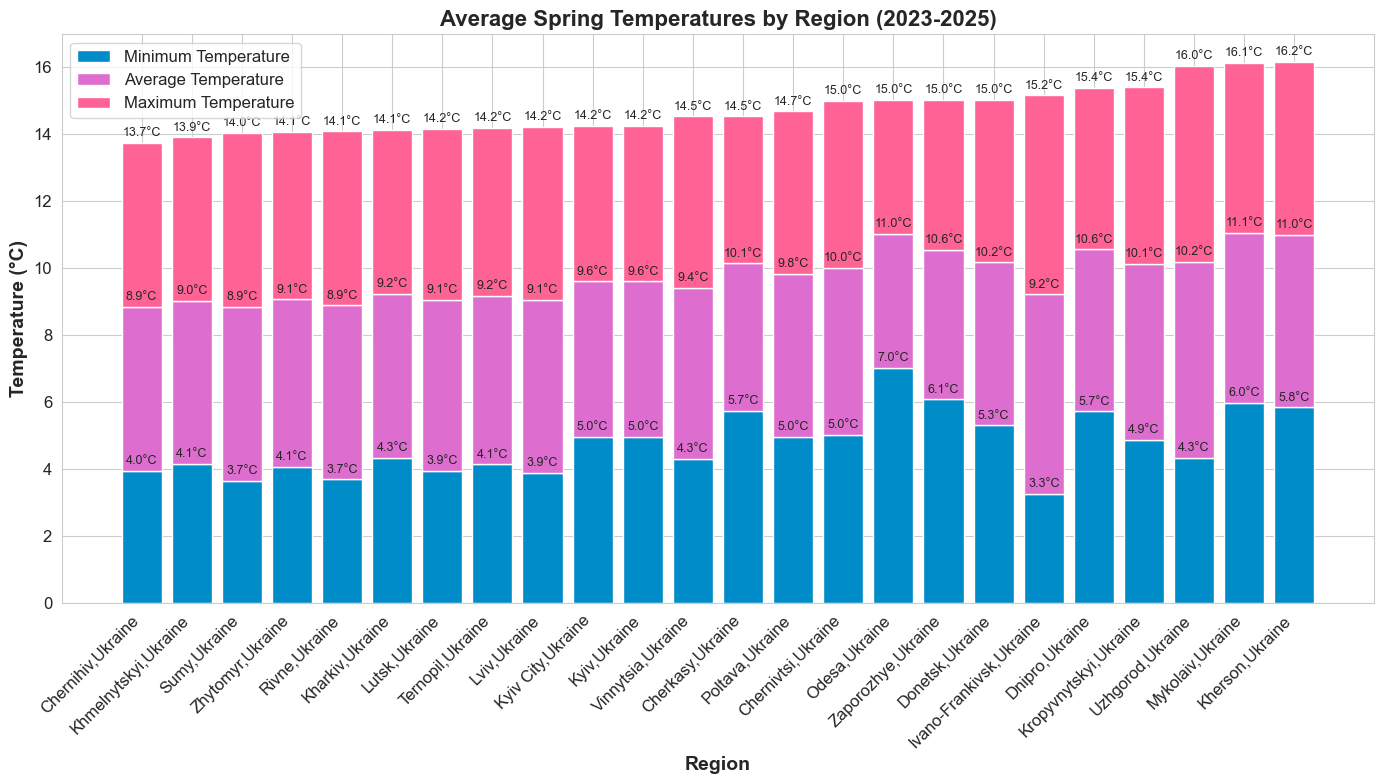

In [14]:
# 5.4. Average minimum, average, and average maximum temperatures during the spring season
def get_spring_data(df):
    spring_df = df[(df['date'].dt.month >= 3) & (df['date'].dt.month <= 5)]
    return spring_df

df_spring = get_spring_data(df)

summary = df_spring.groupby('region_name').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).sort_values(by='tempmax', ascending=True)

summary['avg_temp'] = (summary['tempmax'] + summary['tempmin']) / 2

min_parts = summary['tempmin']
avg_parts = summary['avg_temp'] - summary['tempmin']
max_parts = summary['tempmax'] - summary['avg_temp']
regions = summary.index
x = range(len(regions))
plt.figure(figsize=(14, 8))

colors = {
    'min': '#008bc9',
    'avg': '#dd6ecf',
    'max': '#ff6294'
}

p1 = plt.bar(x, min_parts, label='Minimum Temperature', color=colors['min'])
p2 = plt.bar(x, avg_parts, bottom=min_parts, label='Average Temperature', color=colors['avg'])
p3 = plt.bar(x, max_parts, bottom=min_parts + avg_parts, label='Maximum Temperature', color=colors['max'])

for i in x:
    min_val = summary.iloc[i]['tempmin']
    avg_val = summary.iloc[i]['avg_temp']
    max_val = summary.iloc[i]['tempmax']

    row = summary.iloc[i]
    plt.text(i, row['tempmin'] + 0.2, f"{row['tempmin']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['avg_temp'] + 0.2, f"{row['avg_temp']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['tempmax'] + 0.2, f"{row['tempmax']:.1f}°C", ha='center', fontsize=9)


plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.title("Average Spring Temperatures by Region (2023-2025)",fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
pdf.savefig()
plt.show()


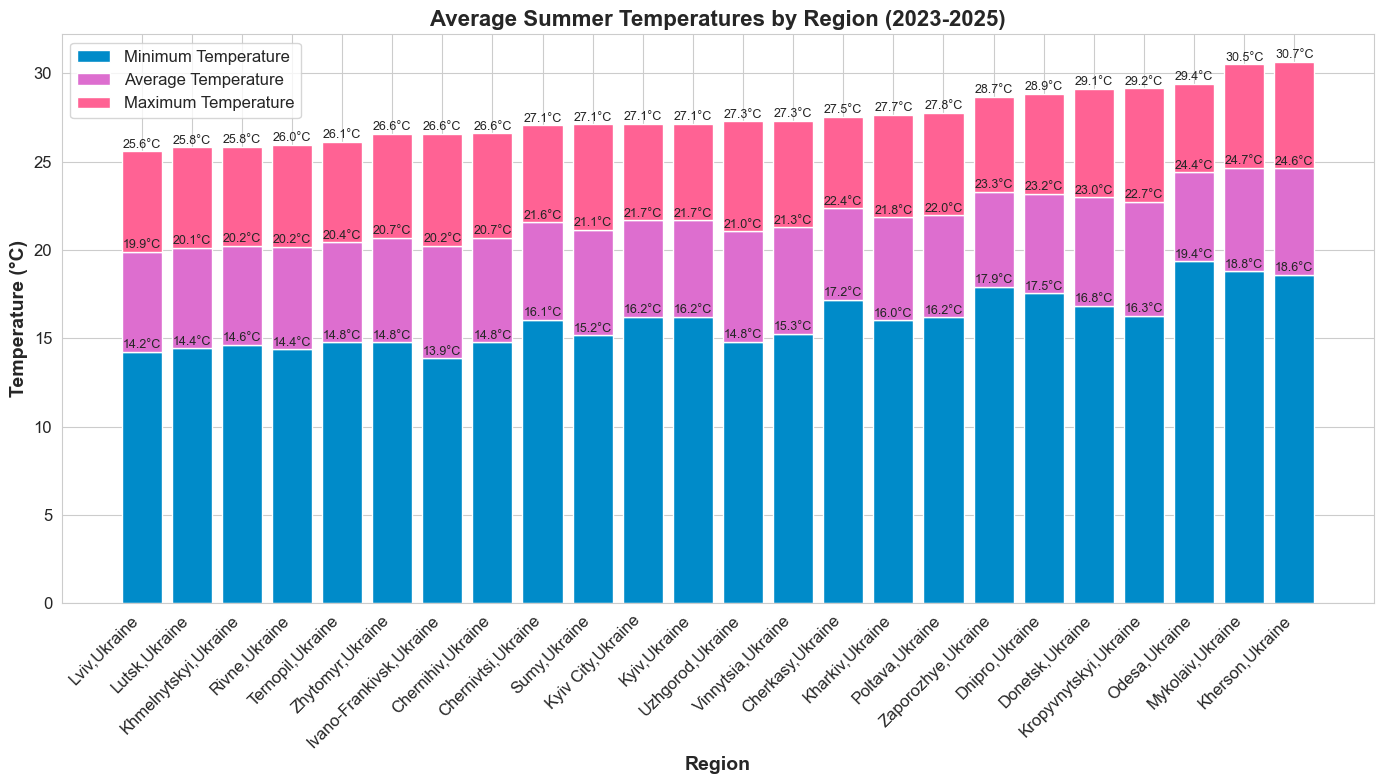

In [15]:
# 5.5. Average minimum, average, and average maximum temperatures during the summer season
def get_summer_data(df):
    summer_df = df[(df['date'].dt.month >= 6) & (df['date'].dt.month <= 8)]
    return summer_df

df_summer = get_summer_data(df)

summary = df_summer.groupby('region_name').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).sort_values(by='tempmax', ascending=True)

summary['avg_temp'] = (summary['tempmax'] + summary['tempmin']) / 2

min_parts = summary['tempmin']
avg_parts = summary['avg_temp'] - summary['tempmin']
max_parts = summary['tempmax'] - summary['avg_temp']
regions = summary.index
x = range(len(regions))
plt.figure(figsize=(14, 8))

colors = {
    'min': '#008bc9',
    'avg': '#dd6ecf',
    'max': '#ff6294'
}

p1 = plt.bar(x, min_parts, label='Minimum Temperature', color=colors['min'])
p2 = plt.bar(x, avg_parts, bottom=min_parts, label='Average Temperature', color=colors['avg'])
p3 = plt.bar(x, max_parts, bottom=min_parts + avg_parts, label='Maximum Temperature', color=colors['max'])

for i in x:
    min_val = summary.iloc[i]['tempmin']
    avg_val = summary.iloc[i]['avg_temp']
    max_val = summary.iloc[i]['tempmax']

    row = summary.iloc[i]
    plt.text(i, row['tempmin'] + 0.2, f"{row['tempmin']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['avg_temp'] + 0.2, f"{row['avg_temp']:.1f}°C", ha='center', fontsize=9)
    plt.text(i, row['tempmax'] + 0.2, f"{row['tempmax']:.1f}°C", ha='center', fontsize=9)


plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.title("Average Summer Temperatures by Region (2023-2025)",fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
pdf.savefig()
plt.show()



Mean values of numeric variables by region:
                          temp  humidity  pressure  windspeed  visibility  \
region_name                                                                 
Cherkasy,Ukraine         11.03     72.82   1016.78      12.17       23.62   
Chernihiv,Ukraine         9.56     75.03   1016.69      11.78       21.53   
Chernivtsi,Ukraine       10.83     73.70   1017.55      10.57       17.83   
Dnipro,Ukraine           11.41     69.47   1016.71      12.32       20.94   
Donetsk,Ukraine          10.79     68.79   1016.82      11.61       23.65   
Ivano-Frankivsk,Ukraine  10.38     75.14   1017.41       9.36       12.05   
Kharkiv,Ukraine           9.52     71.34   1016.40      12.43        8.90   
Kherson,Ukraine          12.83     70.89   1016.52      12.22       13.67   
Khmelnytskyi,Ukraine      9.84     75.08   1017.28      11.74       13.40   
Kropyvnytskyi,Ukraine    11.04     71.61   1016.72      12.52       12.40   
Kyiv City,Ukraine        10.44 

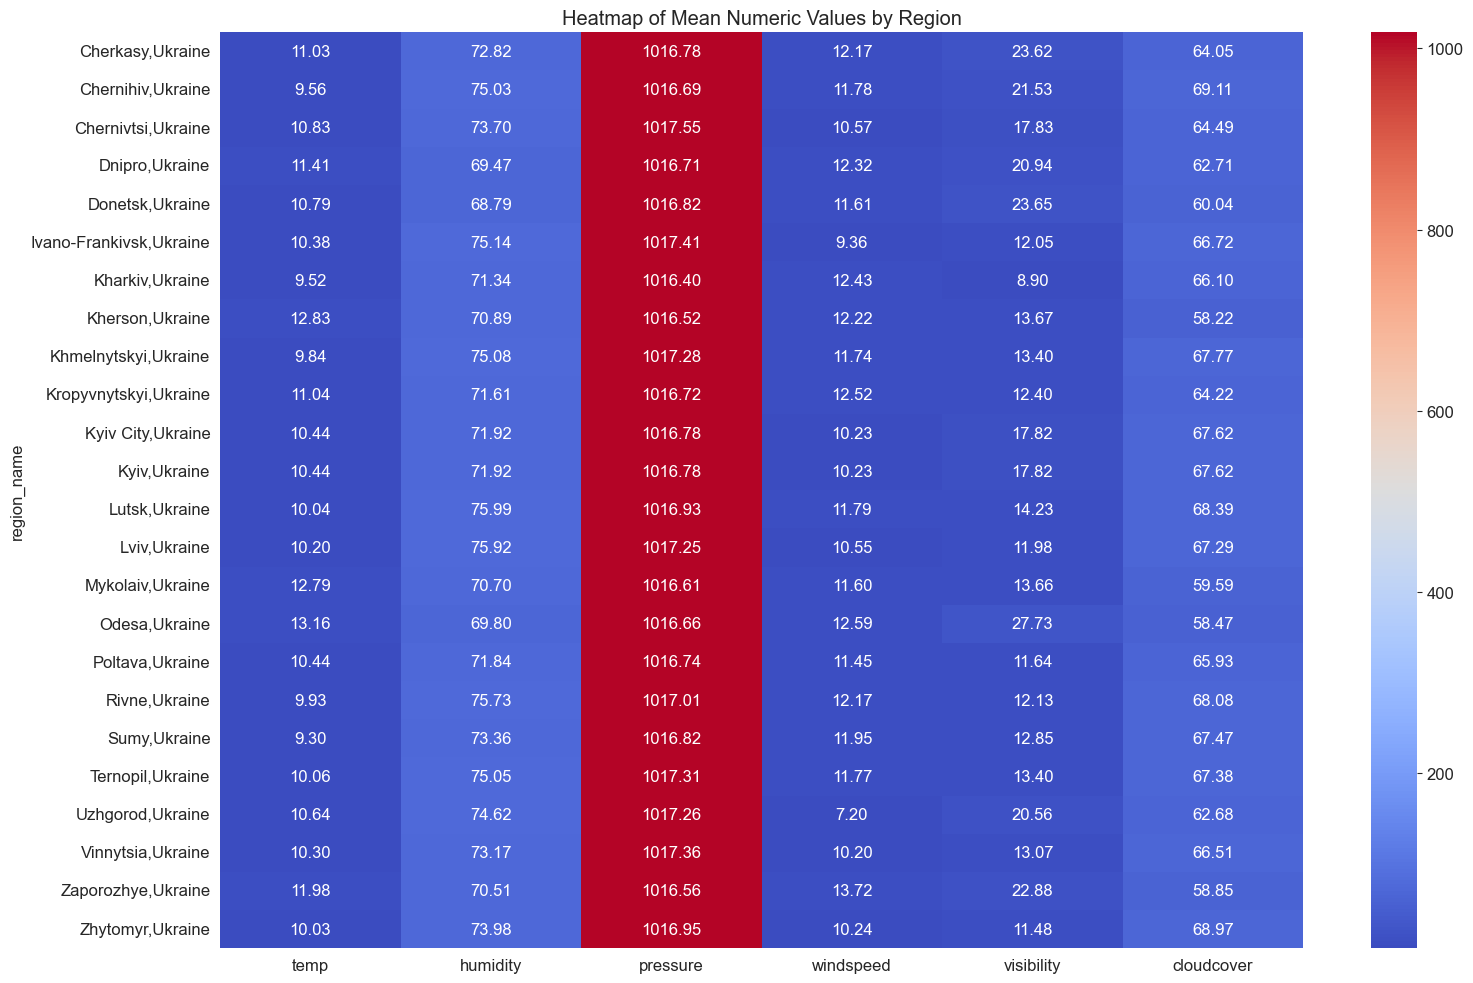


Standard Deviations of Numeric Variables by Region:
                          temp  humidity  pressure  windspeed  visibility  \
region_name                                                                 
Cherkasy,Ukraine          9.83     18.54      8.72       5.74        2.98   
Chernihiv,Ukraine         9.86     18.78      9.30       6.73        5.99   
Chernivtsi,Ukraine        9.35     19.66      8.65       5.76       13.31   
Dnipro,Ukraine           10.26     20.44      8.31       6.33       12.80   
Donetsk,Ukraine          10.61     21.96      8.04       5.57        2.78   
Ivano-Frankivsk,Ukraine   9.20     18.92      8.81       6.57        6.53   
Kharkiv,Ukraine          10.63     21.38      8.81       7.41        2.52   
Kherson,Ukraine          10.03     20.59      7.97       6.49        7.64   
Khmelnytskyi,Ukraine      9.36     18.69      8.82       6.38        6.86   
Kropyvnytskyi,Ukraine    10.15     20.28      8.46       6.37        6.43   
Kyiv City,Ukraine      

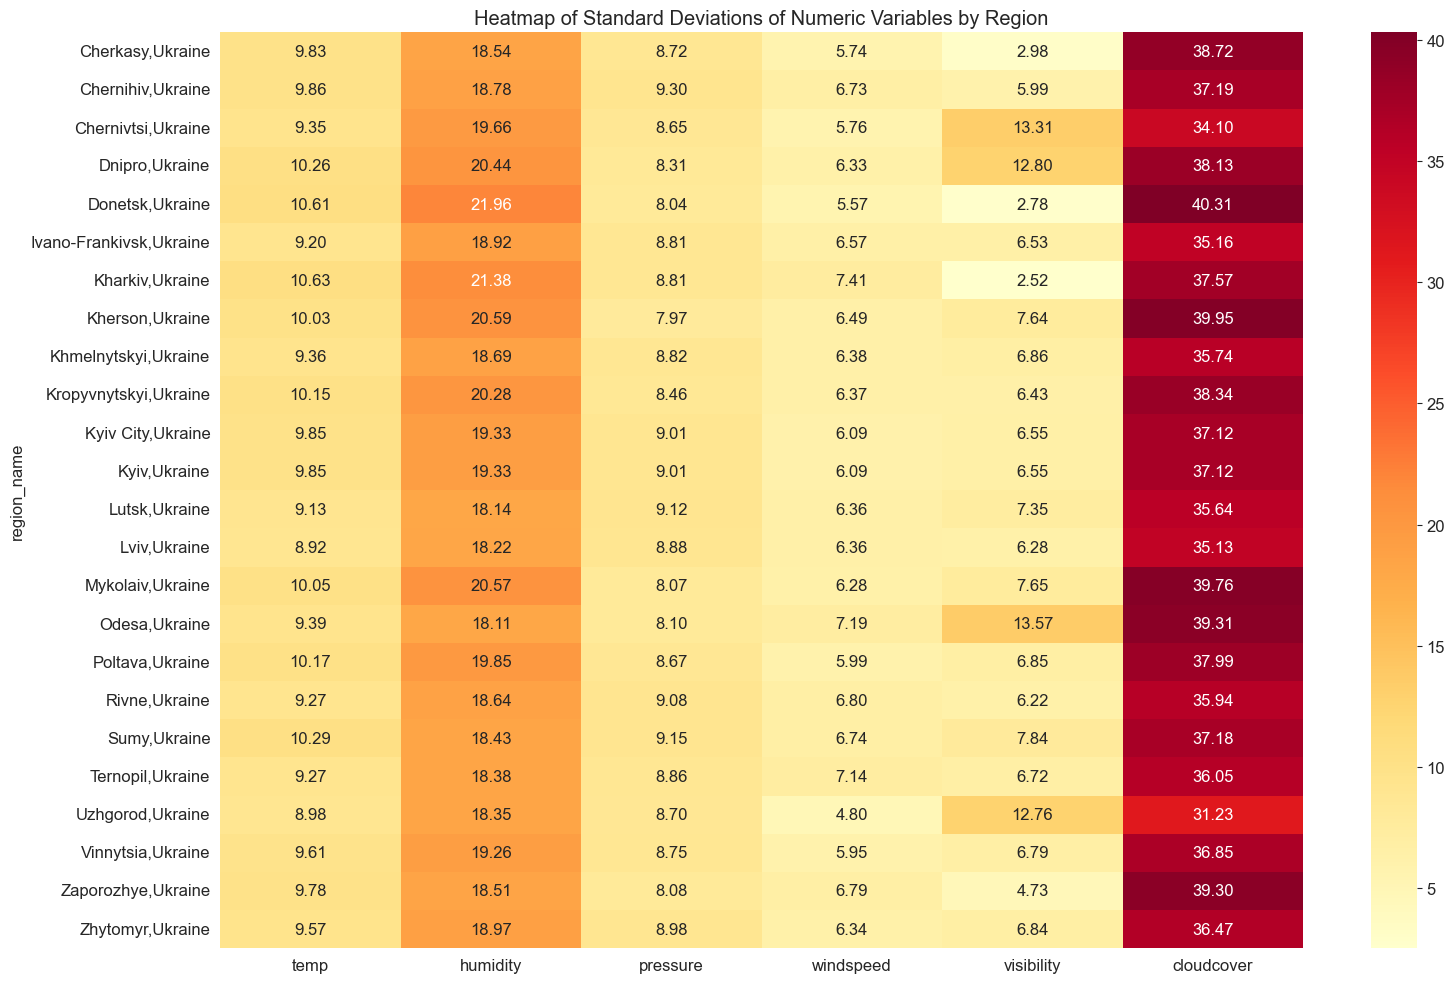

In [16]:
# PART 6: additional analysis (mean values and standard deviations of numeric variables by region)
# 6.1. Mean Values
regional_means = df.groupby(region_column)[numeric_columns].mean().round(2)
print("\nMean values of numeric variables by region:")
print(regional_means)

plt.figure(figsize=(16, 10))
sns.heatmap(regional_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Mean Numeric Values by Region')
plt.tight_layout()
pdf.savefig()
plt.show()


# 6.2. Standard Deviations
regional_std = df.groupby(region_column)[numeric_columns].std().round(2)
print("\nStandard Deviations of Numeric Variables by Region:")
print(regional_std)

plt.figure(figsize=(16, 10))
sns.heatmap(regional_std, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Heatmap of Standard Deviations of Numeric Variables by Region')
plt.tight_layout()
pdf.savefig()
plt.show()
plt.close()

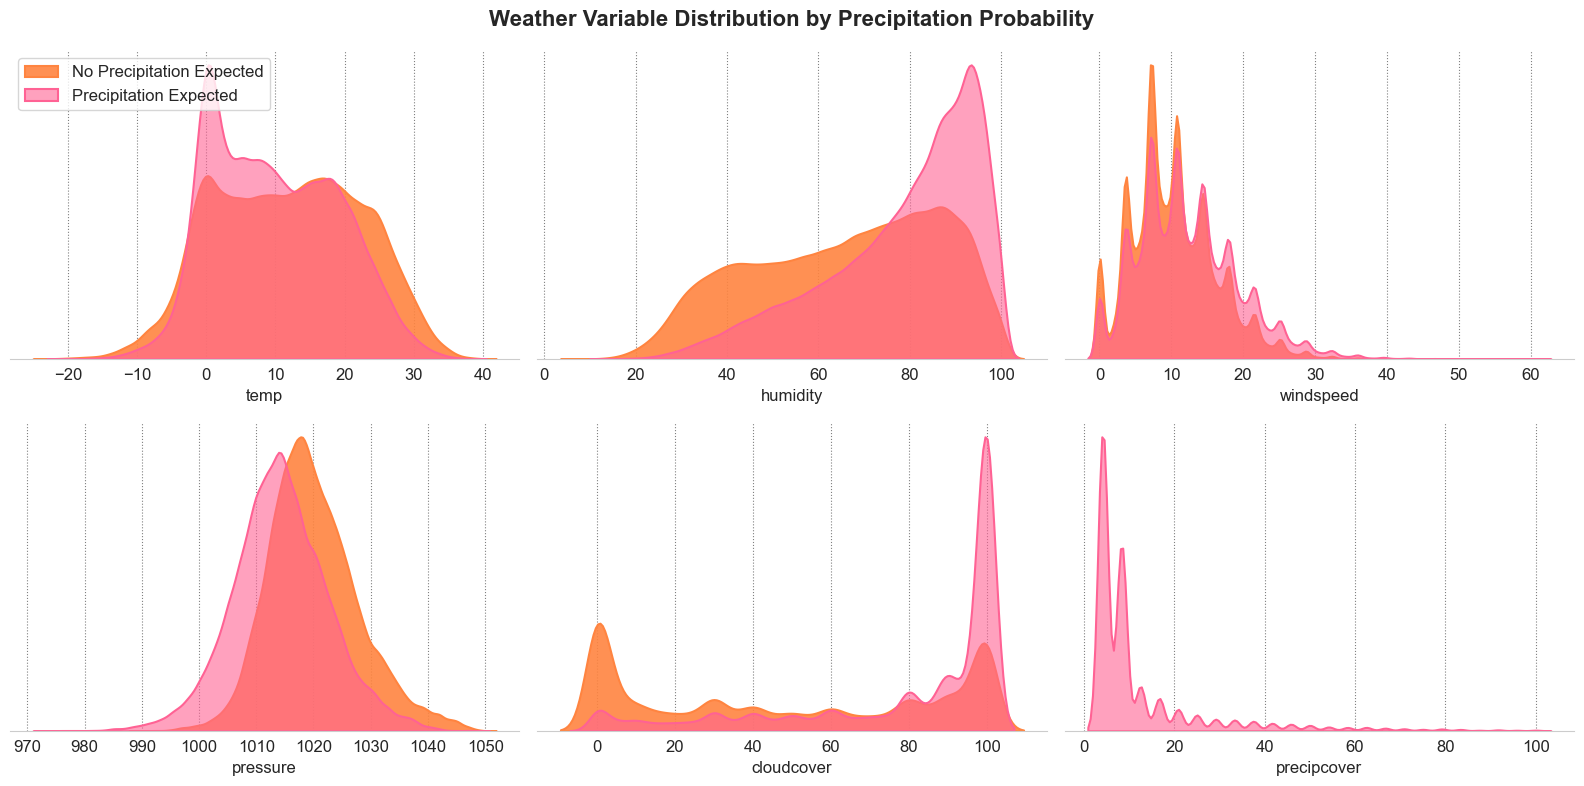

In [17]:
# PART 7: Conditional Distribution Analysis (temperature by precipitation)
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 3)
key_variables = ['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover', 'precipcover']
axes = []

for i, (row, col) in enumerate([(r, c) for r in range(2) for c in range(3)]):
    if i < len(key_variables):
        ax = fig.add_subplot(gs[row, col])
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        ax.set_axisbelow(True)
        for s in ["top", "right", "left"]:
            ax.spines[s].set_visible(False)
        axes.append(ax)

precip_threshold = df['precipcover'].median()

for i, variable in enumerate(key_variables):
    no_precip_data = df[df['precipcover'] < precip_threshold][variable]
    precip_data = df[df['precipcover'] >= precip_threshold][variable]


    sns.kdeplot(no_precip_data, ax=axes[i], color='#ff8440', fill=True,
                linewidth=1.5, alpha=0.9, label='No Precipitation Expected', warn_singular=False)
    sns.kdeplot(precip_data, ax=axes[i], color='#ff6294',
                fill=True, linewidth=1.5, alpha=0.6, label='Precipitation Expected', warn_singular=False)

    axes[i].grid(which='major', axis='x', color='gray', linestyle=':')
    axes[i].set_xlabel(variable)

    if i == 0:
        axes[i].legend(loc='upper left')

fig.suptitle('Weather Variable Distribution by Precipitation Probability', fontsize=16, fontweight='bold')
plt.tight_layout()
pdf.savefig()
plt.show()

In [18]:
pdf.close()